<h1 style="font-size: 48px;">Classification of Neurons and their Function in Biological Networks</h1>

### Final Project-Applied Data Science 2023
#### Dafna Levenberg, Liran Kalderon, Avia Ben Zvi
---

# Introduction

*Background:* The major components of the nervous system are neurons, which transmit information via electrochemical signaling via action potentials and neurotransmitters. The neurotransmitter is a signal molecule released by a neuron in order to influence another cell across a synaptic junction. Depending on the neurotransmitter released, a neuron could be classified as either excitatory or inhibitory. Among the common neurotransmitters are glutamate, GABA, acetylcholine, glycine, and norepinephrine. Analyzing neuronal activity recordings is essential for understanding complex brain processes. Based on the electrical characteristics of neurons, we suggest that different types can be distinguished.

<img src="synapse.jpg" alt="Structure of a typical chemical synapse." width="500" height="300">

*Figure 1:* Structure of a typical chemical synapse.

*Data analysis:* The data was derived from electrical recordings of mice cortical neurons. These data were obtained from the ["Allen cell type"](https://celltypes.brain-map.org/data?donor__species=Mus%20musculus) website. The given raw data is of voltage as function of time, and it was edited into tabular data by Ofek Ophir (an M.Sc. student in Bar Ilan University) based on characteristics of the electrical activity such as signal amplitude, frequency, signal duration, cell source, cell type, etc. The data is used to classify neuron type as GABAergic/Glutamatergic, i.e., inhibitory/excitatory (respectively), which indicates the cell's function in the biological network.

Initially, we will visualize and analyze the data using EDA. Trends and correlations between some features will be examined, and the data will be arranged accordingly. 

*ML models:* Two ML-approaches will be used:

1. Supervised learning, to predict the most relevant label for a neuron. At present, we aim to predict the type of neuron.

2. Unsupervised learning, to find possible clustering options for neurons, or detect anomalies in the data.

*Motivation:* By predicting neuron types based on their electrical activity patterns, we could pave the way toward the detection of healthy or diseased neurons in the future. With appropriate data, this approach could also be expanded to the diagnostic of diseased areas in the whole human brain.

**Data explanation:**

The electrical activity of the neurons in response to four different types of electrical stimulation was recorded. The features were calculated from the raw data for each stimulus pattern separately. 

<img src="Stimulations.png" alt="Structure of a typical chemical synapse." width="500" height="300">

*Figure 2:* The four types of electrical stimulations that were used.

The following table shows the description of each feature:

In [61]:
import pandas as pd

feature_explanation=pd.read_csv('Feature description.csv')
feature_explanation=feature_explanation.style.set_properties(**{'text-align': 'left'})
feature_explanation

,Feature name,Feature type,Explanation
0,transgenic_line,"Categorial (Sst+, Pvalb+, Htr3a+|Vip-, Vip+, Glutametric)",A transgenic mouse line refers to a group of mice that carry a specific foreign gene (transgene) that has been artificially introduced into their genome.
1,neurotransmitter,"Categorial (GABAergic, Glutamatergic)","A neurotransmitter is a chemical messenger that transmits signals between nerve cells (neurons) in the nervous system, allowing communication and coordination of various physiological and cognitive processes in the body. Here there are two types: GABA (Gamma-Aminobutyric Acid) is a major inhibitory neurotransmitter in the central nervous system Glutamate is the primary excitatory neurotransmitter in the central nervous system"
2,reporter_status,"Categorial (Yes,No)",Reporter is a type of genetic or molecular marker that is used to identify and study specific properties or activities of neurons.
3,dendrite_type,"Categorial (Spiny,Aspiny)",Refers to the structural classification of dendrites. These spines are the sites of excitatory synapses while aspiny dendrites typically receive inhibitory synaptic inputs.
4,layer,"Categorial (L1, L2/L3, L4, L5, L6a, L6b)",Refers to the neuron origin layer in the cortex.
5,threshold_v_noise,numeric,The voltage of the membrane potential during the start of action potential in mV for noise stimulus.
6,threshold_i_noise,numeric,The level of injected current during the start of action potential for noise stimulus.
7,peak_v_noise,numeric,"Maximum value of the membrane potential during the action potential (i.e., between the action potential’s threshold and the time of the following action potential or end of the response) for noise stimulus."
8,peak_i_noise,numeric,"The value of the injected current at the action potential peak (i.e., when the membrane potential is maximal during the action potential) for noise stimulus."
9,trough_v_noise,numeric,Minimum value of membrane potential in the interval between the peak and the time of the following action potential for noise stimulus


<img src="Feature1.png" alt="Graphic visualization of some features on a typical neural spike" width="500" height="300">

*Figure 3:* Graphic visualization of some features on a typical neural spike.

# Exploratory Data Analysis (EDA)

Importing some relevant libraries:

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing the data:

In [63]:
df=pd.read_csv('ephys_data_mice.csv')

Presenting the raw dataframe and its characteristics:

In [64]:
df.head()

,transgenic_line,neurotransmitter,reporter_status,dendrite_type,layer,threshold_v_noise,threshold_i_noise,peak_v_noise,peak_i_noise,trough_v_noise,trough_i_noise,upstroke_noise,upstroke_v_noise,downstroke_noise,downstroke_v_noise,fast_trough_v_noise,fast_trough_i_noise,width_noise,upstroke_downstroke_ratio_noise,f_i_curve_slope,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,input_resistance_mohm,latency,peak_v_long_square,peak_v_ramp,peak_v_short_square,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,file_name
0,Sst+,GABAergic,positive,aspiny,L5,-33.490959,536.025940,28.835495,537.739807,-55.978970,531.014160,299.764818,-0.535574,-217.133925,-1.393082,-55.651138,537.142273,0.000482,1.372739,0.020384,-59.187500,-57.437500,-62.600004,143.634288,0.02714,35.375004,31.343750,34.662501,119.977675,0.054033,1.317484,11.291090,270.0,343.125000,800.0,-36.281250,-33.812500,-43.500002,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987,565871768_62
1,Pvalb+,GABAergic,positive,aspiny,L4,-38.694119,463.681763,17.997391,464.439911,-56.637856,462.351837,360.113308,-6.811609,-274.223488,-7.690109,-56.432980,465.101593,0.000317,1.315004,1.156789,-55.687504,-52.390625,-57.546877,129.903104,0.01187,14.843751,19.000002,27.546876,65.624997,0.096598,1.044561,4.121689,290.0,268.562500,270.0,-31.781252,-29.187501,-44.046875,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976,469801138_58
2,Pvalb+,GABAergic,positive,aspiny,L2/L3,-32.416935,457.616455,22.210737,456.798065,-47.572384,355.919861,210.460299,-2.773237,-52.187941,4.122596,-43.588943,424.087616,0.001042,4.060156,0.191853,-47.093754,-51.447919,-55.989586,173.215264,0.07472,16.781250,23.052084,27.770835,102.968708,0.030460,2.283349,5.166574,280.0,185.083333,720.0,-28.781252,-32.312503,-38.197918,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036,605889373_67
3,Htr3a+|Vip-,GABAergic,positive,aspiny,L2/L3,-30.264706,195.426468,11.924632,195.602936,-48.987133,161.492645,196.672333,-10.977942,-96.910837,-4.700367,-45.468750,193.816177,0.000659,2.015052,0.029299,-48.593754,NaN,-51.632815,268.823776,0.00878,23.625002,NaN,26.984375,233.281165,0.370841,1.091393,11.657315,110.0,NaN,280.0,-32.531250,NaN,-41.265626,-48.593754,NaN,-63.257814,2.132316,NaN,2.185564,-87.656250,-62.055580,583836069_40
4,Glutamatergic,Glutamatergic,positive,spiny,L5,-37.541275,121.457550,41.824291,121.318398,-53.327831,98.995285,334.820846,3.641510,-91.202334,16.553066,-43.495281,119.950470,0.000850,3.668570,0.177671,-45.843754,-47.145836,-51.700002,214.522896,0.04876,45.562504,48.552083,45.925002,164.062530,0.219570,1.727257,18.353459,70.0,58.625000,720.0,-38.093754,-38.697918,-45.306252,-57.281254,-56.406253,-70.537502,4.059995,4.121745,4.017244,-87.093758,-69.362984,504615116_56


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   transgenic_line                         1424 non-null   object 
 1   neurotransmitter                        1424 non-null   object 
 2   reporter_status                         1424 non-null   object 
 3   dendrite_type                           1424 non-null   object 
 4   layer                                   1424 non-null   object 
 5   threshold_v_noise                       1424 non-null   float64
 6   threshold_i_noise                       1424 non-null   float64
 7   peak_v_noise                            1424 non-null   float64
 8   peak_i_noise                            1424 non-null   float64
 9   trough_v_noise                          1424 non-null   float64
 10  trough_i_noise                          1424 non-null   floa

In [66]:
df.describe()

,threshold_v_noise,threshold_i_noise,peak_v_noise,peak_i_noise,trough_v_noise,trough_i_noise,upstroke_noise,upstroke_v_noise,downstroke_noise,downstroke_v_noise,fast_trough_v_noise,fast_trough_i_noise,width_noise,upstroke_downstroke_ratio_noise,f_i_curve_slope,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,input_resistance_mohm,latency,peak_v_long_square,peak_v_ramp,peak_v_short_square,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1421.000000,1424.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1383.000000,1424.000000,1424.000000,1424.000000
mean,-37.431562,244.674780,26.309444,244.365436,-53.908652,206.032916,275.037410,-5.687562,-113.655732,3.795258,-49.511096,237.338450,0.000801,2.842494,0.321717,-51.789065,-50.716310,-55.614845,213.063022,0.040703,30.226959,32.177223,33.270867,178.024334,0.066275,1.833338,17.580345,137.833567,124.628366,608.250581,-38.007375,-36.062601,-44.677922,-55.176969,-54.581137,-72.919151,2.865580,2.867415,2.866585,-91.398815,-72.201468
std,4.158966,165.303108,10.884569,165.476055,4.776337,157.424308,76.611484,5.991263,60.226682,10.867800,6.236290,162.865269,0.000272,1.112576,0.349014,6.145358,5.042570,5.244299,99.308719,0.046633,11.134347,11.918797,10.070839,76.823225,0.054002,0.695529,9.632492,101.399003,92.117361,292.903810,4.665954,4.438853,4.021526,4.850468,4.267423,5.370018,1.043058,1.103793,1.018130,6.385157,5.498155
min,-59.233829,10.586538,-3.980070,10.471154,-75.830826,8.403846,73.178706,-23.382812,-459.137856,-23.330883,-75.671272,10.125000,0.000234,0.959681,-0.043151,-76.843750,-68.218758,-73.218754,53.943620,0.002120,-2.562500,-6.864584,-1.515625,36.562461,-0.034598,-0.460931,3.472114,10.000000,7.125000,32.000000,-56.156250,-55.937504,-59.250003,-76.968750,-75.625000,-85.062504,0.862726,0.660428,0.997145,-105.281258,-85.449173
25%,-39.959469,121.687435,18.449385,121.324388,-56.945386,98.932577,218.087402,-9.747297,-135.088173,-6.011626,-53.257794,119.552298,0.000617,1.777504,0.134100,-55.781254,-53.812503,-59.314457,147.949112,0.015805,22.875002,24.130209,26.704688,124.375066,0.028507,1.314460,10.341854,70.000000,60.895832,390.000000,-40.968754,-38.848960,-47.272994,-58.031254,-57.156252,-76.850392,2.024889,1.984398,2.020518,-96.406250,-76.089378
50%,-37.396292,206.435989,27.479929,206.084938,-53.814541,160.437271,272.780060,-5.570349,-93.999485,5.502762,-48.781342,199.059525,0.000820,2.919096,0.202720,-50.687504,-50.135419,-54.634378,190.277552,0.033298,31.921876,34.583333,34.291147,164.609358,0.051743,1.656633,16.289397,110.000000,97.000000,570.000000,-37.656250,-35.968753,-44.943750,-54.906254,-54.833337,-73.375004,2.976338,2.988108,2.890265,-91.875000,-72.710697
75%,-34.670746,326.734062,34.968261,327.064392,-50.888050,268.481873,329.048648,-1.291786,-73.420056,13.106021,-45.281438,313.220985,0.000958,3.653600,0.338550,-47.398440,-47.286462,-51.683596,249.900080,0.051735,38.500001,41.630211,40.887501,215.468768,0.089273,2.195572,22.821413,180.000000,161.041667,780.000000,-34.687500,-33.119793,-42.253256,-52.031254,-52.161460,-69.520704,3.619072,3.677777,3.637176,-87.046877,-68.769083
max,-15.706731,1270.935425,49.691666,1274.050659,-35.747597,1275.573242,543.199511,12.930000,-28.029791,26.892736,-25.537661,1276.512817,0.002133,6.976722,2.759427,-32.562500,-33.781251,-40.822918,926.780160,0.781440,

### Cleaning and preparing the data
 
 The data is in a tidy format.
Now, let`s clean it.

Removing the feature \`file name\` since it is not relevant:

In [67]:
df=df.drop('file_name',axis=1) 

Finding the missing values in the data:

<AxesSubplot:>

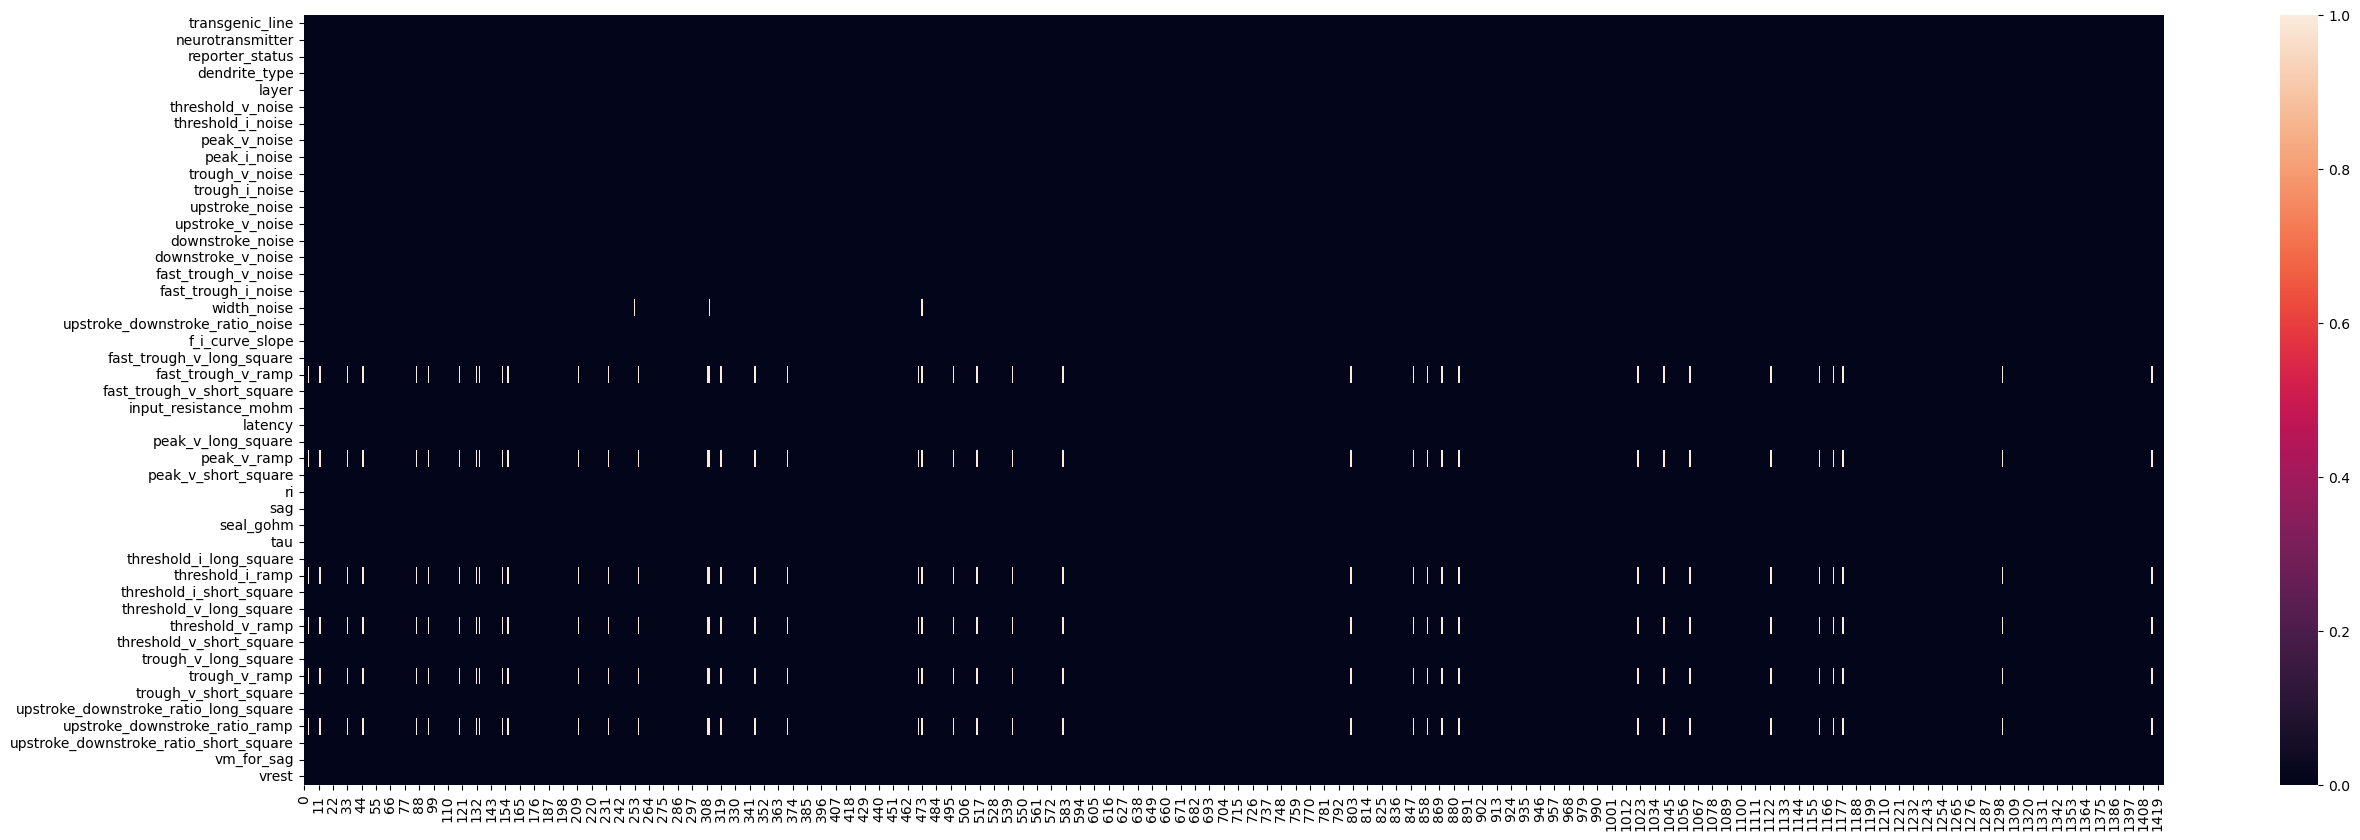

In [68]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.isnull().T.astype(int)) 

In [69]:
df.isnull().sum().sort_values(ascending=False)

peak_v_ramp                               41
fast_trough_v_ramp                        41
upstroke_downstroke_ratio_ramp            41
trough_v_ramp                             41
threshold_v_ramp                          41
threshold_i_ramp                          41
width_noise                                3
transgenic_line                            0
threshold_i_long_square                    0
peak_v_short_square                        0
ri                                         0
sag                                        0
seal_gohm                                  0
tau                                        0
threshold_i_short_square                   0
latency                                    0
threshold_v_long_square                    0
threshold_v_short_square                   0
trough_v_long_square                       0
trough_v_short_square                      0
upstroke_downstroke_ratio_long_square      0
upstroke_downstroke_ratio_short_square     0
vm_for_sag

Handling the missing data (numerical features) by mean imputation:

In [70]:
df_noNA = df.fillna(df.mean())
# Making sure that the imputation run well
df_noNA.isnull().sum().sort_values(ascending=False)

transgenic_line                           0
threshold_i_short_square                  0
peak_v_long_square                        0
peak_v_ramp                               0
peak_v_short_square                       0
ri                                        0
sag                                       0
seal_gohm                                 0
tau                                       0
threshold_i_long_square                   0
threshold_i_ramp                          0
threshold_v_long_square                   0
neurotransmitter                          0
threshold_v_ramp                          0
threshold_v_short_square                  0
trough_v_long_square                      0
trough_v_ramp                             0
trough_v_short_square                     0
upstroke_downstroke_ratio_long_square     0
upstroke_downstroke_ratio_ramp            0
upstroke_downstroke_ratio_short_square    0
vm_for_sag                                0
latency                         

### Descriptive statistics

**Exploring the numerical features**


Plotting the distributions of the numerical features:

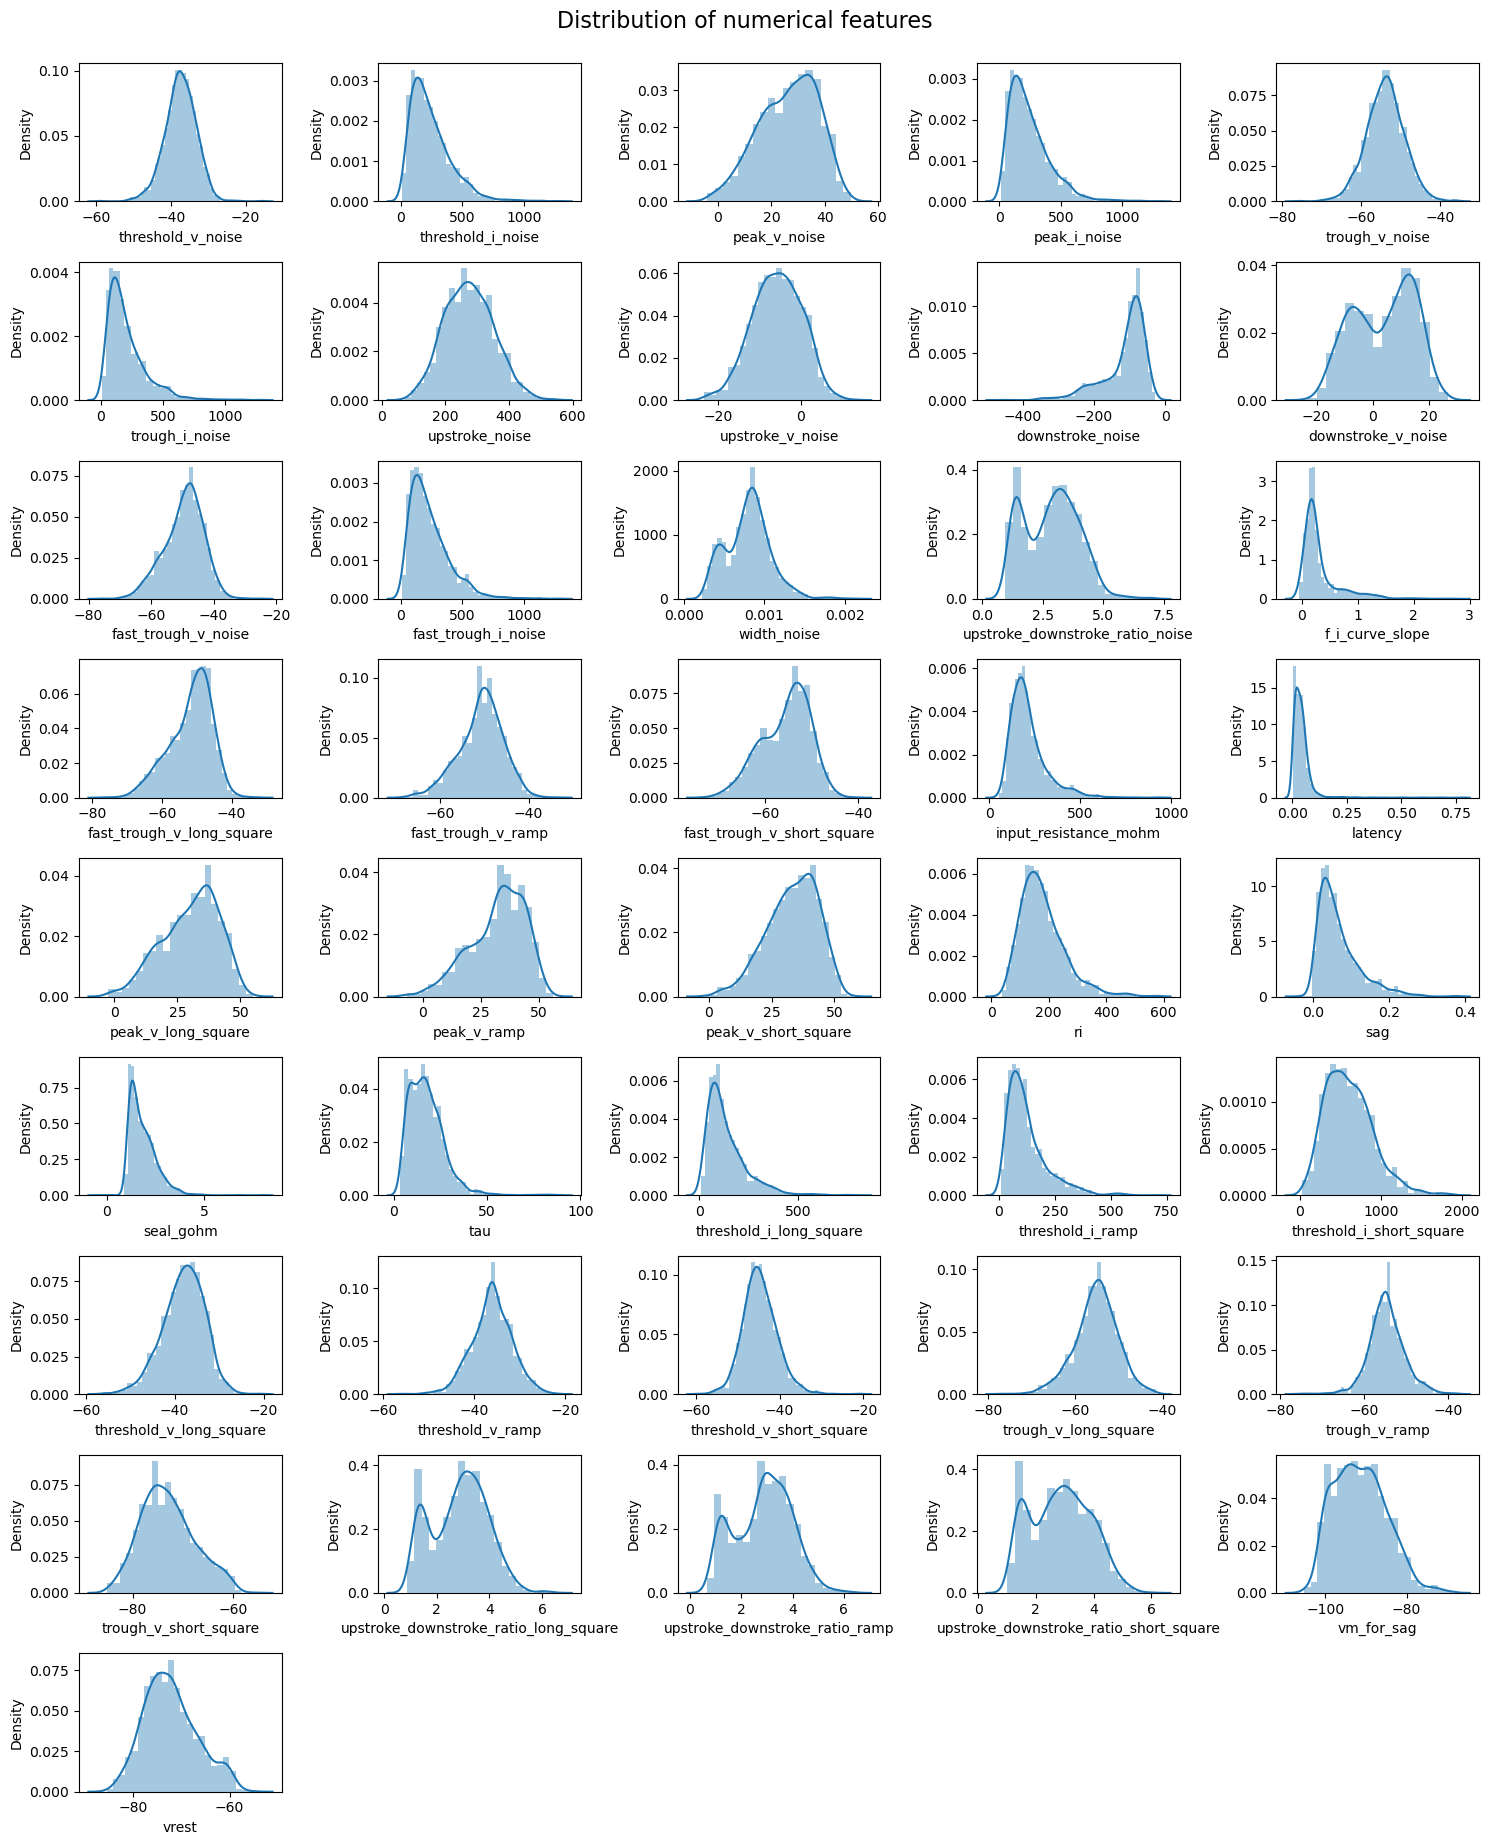

In [71]:
num_rows = 9
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < 41:  
        sns.distplot(df_noNA.iloc[:, i + 5], ax=ax)  
    else:     
        fig.delaxes(ax)

fig.suptitle("Distribution of numerical features", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


We can see that most of the features are not normally distributed.

Another informative way to look at our data is by using boxplots: 

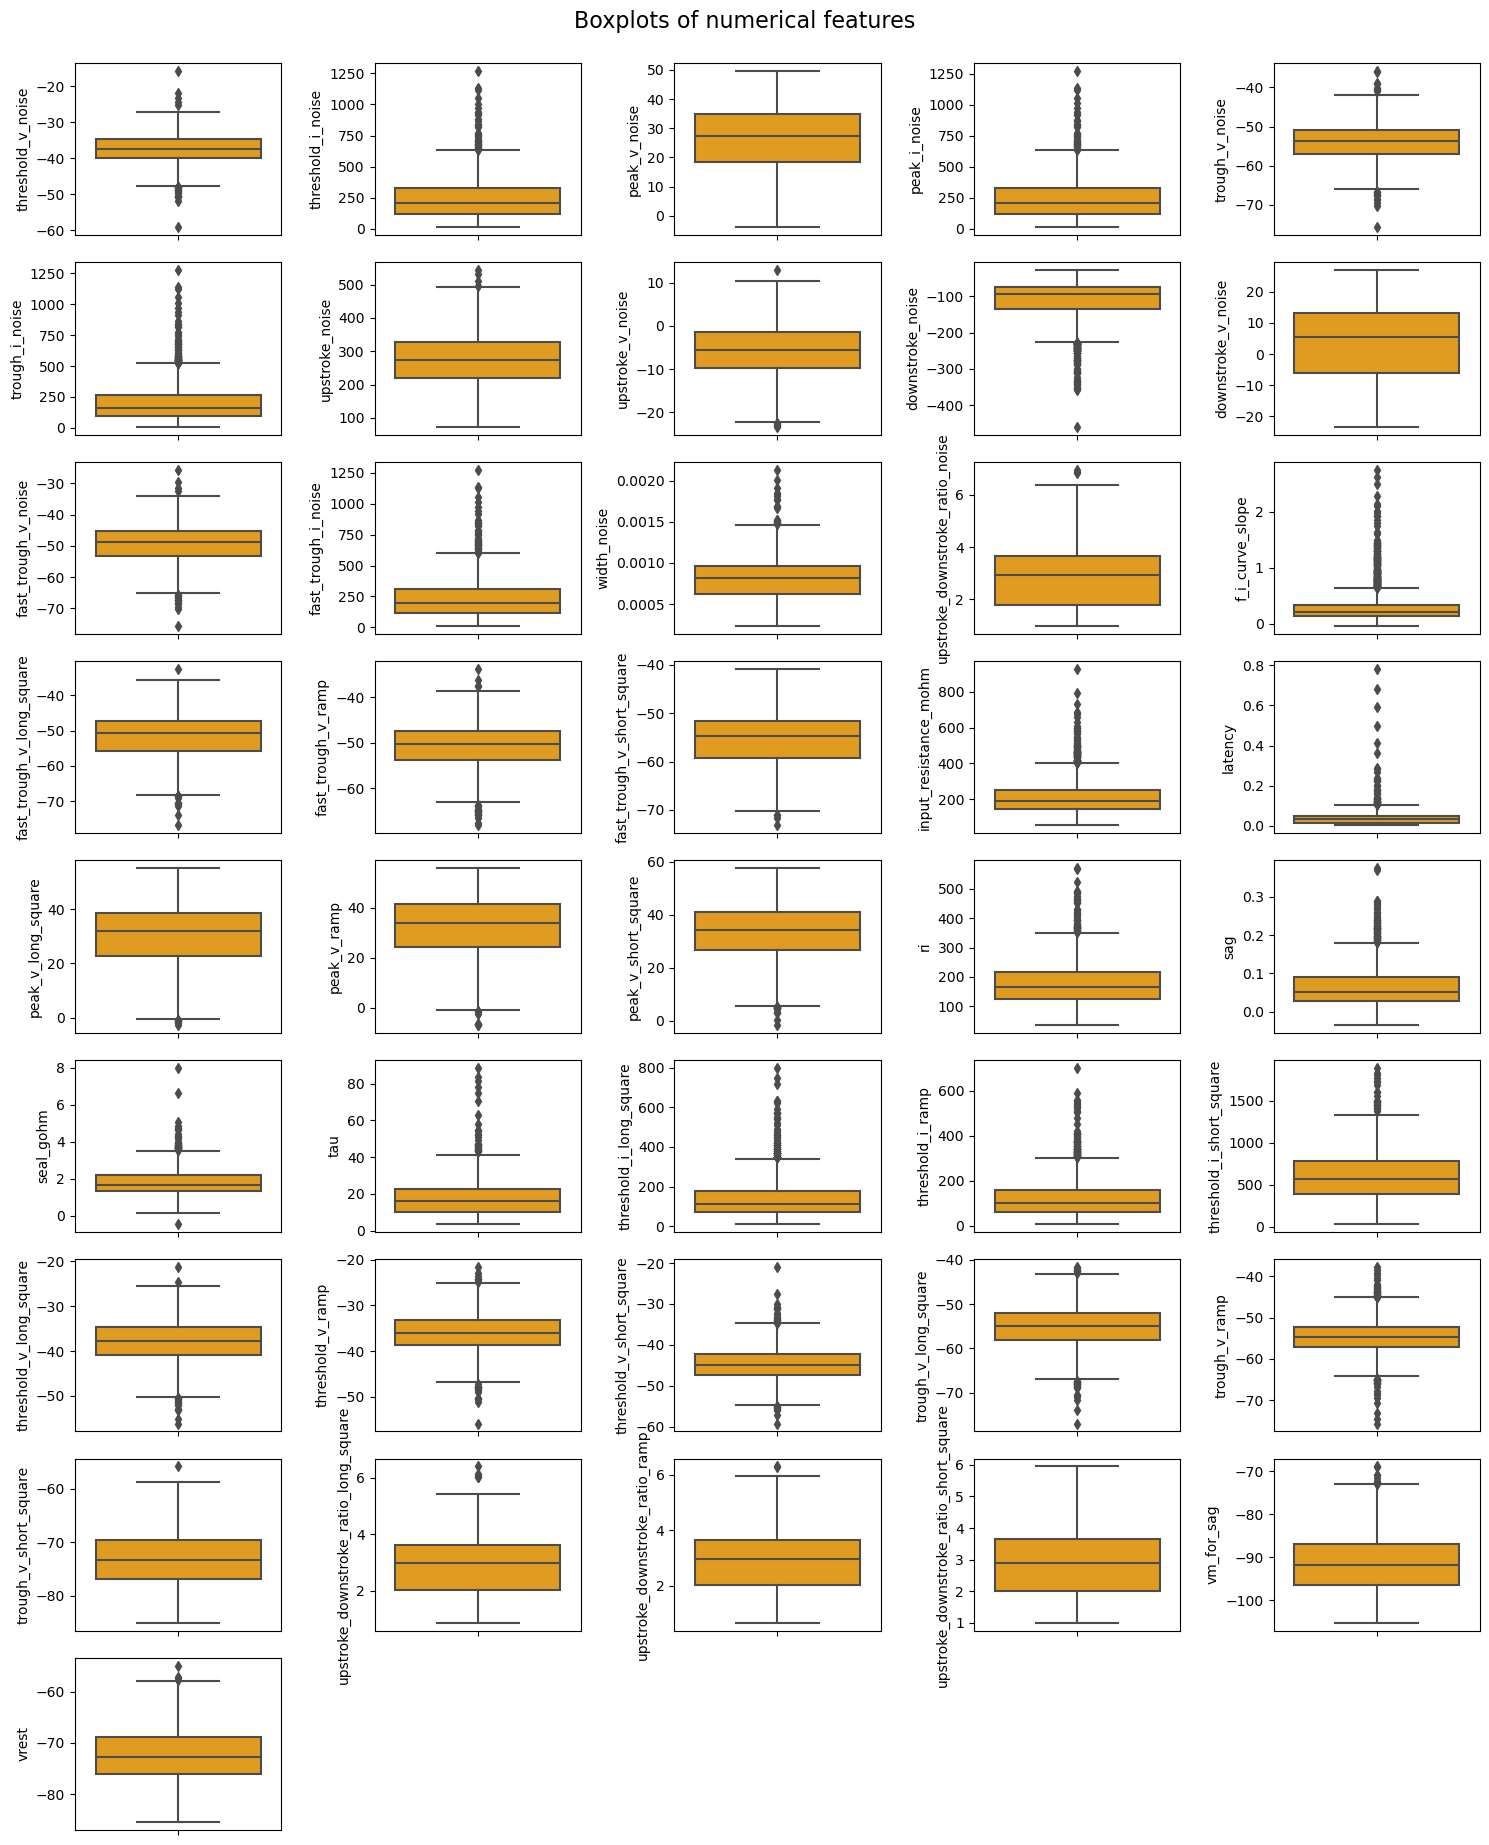

In [72]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < 41:
        sns.boxplot(y=df_noNA.iloc[:, i + 5], ax=ax, color='orange')
    else:
        fig.delaxes(ax)

fig.suptitle("Boxplots of numerical features", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

It can be seen that many of the features have outliers. 

To detect the outliers we will use a non-parametric approach due to the non normal distributions:

In [73]:
df_noNA_numeric=df_noNA.iloc[:,5:46]

q1 = df_noNA_numeric.quantile(0.25)
q3 = df_noNA_numeric.quantile(0.75)
iqr = q3 - q1
threshold = 3  # We detected extreme outliers since we had too much outliers when threshold was set to 1.5 and we didn`t want to lose too much data

extreme_outliers_across_columns = df_noNA_numeric[((df_noNA_numeric < (q1 - threshold * iqr)) | (df_noNA_numeric > (q3 + threshold * iqr))).any(axis=1)]
print(extreme_outliers_across_columns)

      threshold_v_noise  threshold_i_noise  peak_v_noise  peak_i_noise  \
1            -38.694119         463.681763     17.997391    464.439911   
3            -30.264706         195.426468     11.924632    195.602936   
9            -35.163677         453.393555     16.122437    454.723846   
13           -36.817432          50.516449     11.453947     50.210526   
21           -47.214947         633.062317     -2.627741    633.807251   
25           -45.258335        1054.499634     13.514008   1056.836914   
28           -42.015045         157.026627     17.022762    157.182098   
33           -42.847176         288.436645      3.939641    289.511993   
36           -36.943638          44.354912     32.554131     44.265625   
39           -31.616320          77.703705     31.059896     76.728012   
41           -30.455368         214.043732     -2.071312    214.417755   
49           -30.293097         522.300110      6.871277    525.309570   
54           -39.139824         824.42

Creating a data frame without the extreme outliers (roughly 11.9% of the data):

In [74]:
df_noNA_noOutliers_numeric=df_noNA_numeric.drop(extreme_outliers_across_columns.index)
print(df_noNA_noOutliers_numeric)

      threshold_v_noise  threshold_i_noise  peak_v_noise  peak_i_noise  \
0            -33.490959         536.025940     28.835495    537.739807   
2            -32.416935         457.616455     22.210737    456.798065   
4            -37.541275         121.457550     41.824291    121.318398   
5            -39.368126         272.029999     36.275623    271.239990   
6            -34.328571         270.575012     32.151787    270.135712   
...                 ...                ...           ...           ...   
1419         -34.748547         218.840118     28.313227    218.770355   
1420         -33.918686         315.282623     24.195862    315.964050   
1421         -42.742188         170.086395     33.187042    169.803314   
1422         -39.389061         365.622925     40.803646    365.997925   
1423         -37.038055         144.199264     20.931313    144.095291   

      trough_v_noise  trough_i_noise  upstroke_noise  upstroke_v_noise  \
0         -55.978970      531.014160 

**Exploring the categorial features**

In [75]:
df_noNA_categorial=df_noNA.iloc[:,0:5]
df_noNA_categorial.head()

,transgenic_line,neurotransmitter,reporter_status,dendrite_type,layer
0,Sst+,GABAergic,positive,aspiny,L5
1,Pvalb+,GABAergic,positive,aspiny,L4
2,Pvalb+,GABAergic,positive,aspiny,L2/L3
3,Htr3a+|Vip-,GABAergic,positive,aspiny,L2/L3
4,Glutamatergic,Glutamatergic,positive,spiny,L5


Removing the \'reporter_status\' feature since it is not relevant information to our research question:

In [76]:
df_noNA_categorial=df_noNA_categorial.drop(columns='reporter_status')

Plotting the distributions of the categorial features:

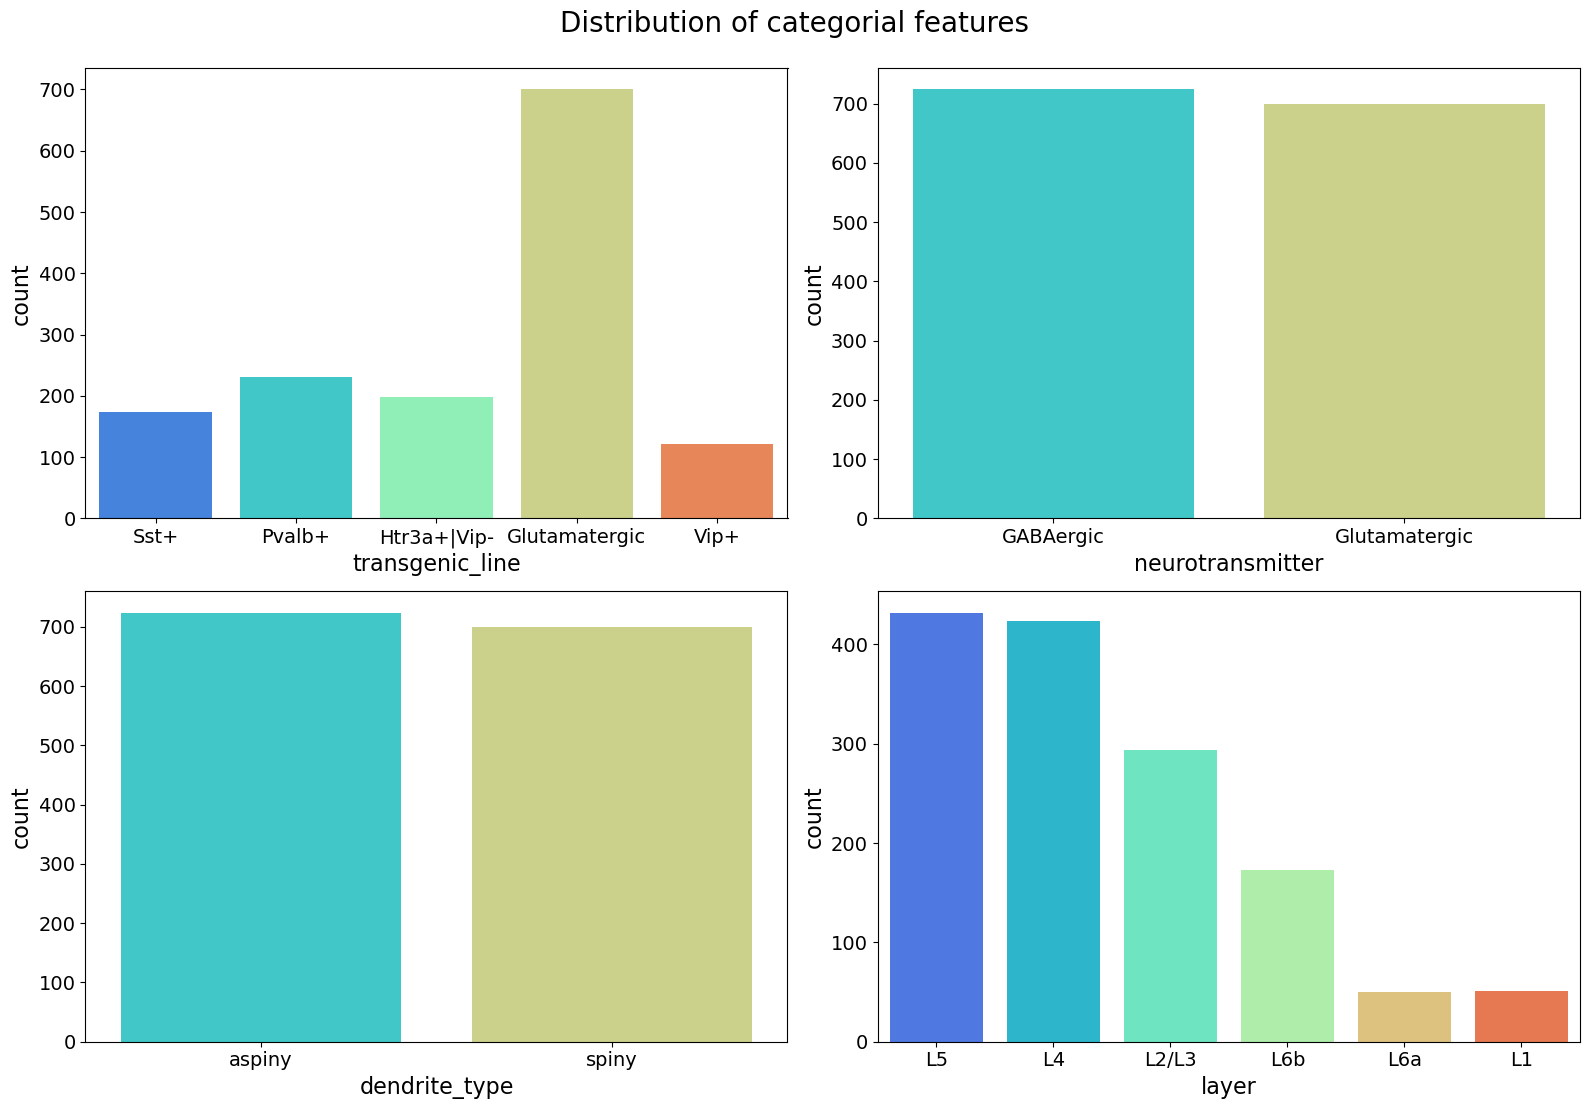

In [77]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < 4:
        sns.countplot(x=df_noNA_categorial.iloc[:, i], ax=ax, palette='rainbow')
        ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
        ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
        ax.tick_params(axis='both', labelsize=14)
    else:
        fig.delaxes(ax)

fig.suptitle("Distribution of categorial features", fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The Sst+, Pvalb+, Htr3a+|Vip-, Vip+ are all considered as GABAergic neurotrasnsmitter. Hence, the proportions represented in the countplots of the transgenic_line and the neurotransmitter features are reasonable.

Now, we will drop the outliers from the categorial feature dataframe as well to enable merging the categorial and the numerical dataframes:

In [78]:
df_noNA_noOutliers_categorial=df_noNA_categorial.drop(extreme_outliers_across_columns.index)
df_noNA_noOutliers_categorial.head()

,transgenic_line,neurotransmitter,dendrite_type,layer
0,Sst+,GABAergic,aspiny,L5
2,Pvalb+,GABAergic,aspiny,L2/L3
4,Glutamatergic,Glutamatergic,spiny,L5
5,Glutamatergic,Glutamatergic,spiny,L6b
6,Glutamatergic,Glutamatergic,spiny,L4


Generating the dataset including the nomerical and categorial features which we will work with from now on:

In [79]:
df_final=pd.concat([df_noNA_noOutliers_numeric,df_noNA_noOutliers_categorial], axis=1)
df_final.head()

,threshold_v_noise,threshold_i_noise,peak_v_noise,peak_i_noise,trough_v_noise,trough_i_noise,upstroke_noise,upstroke_v_noise,downstroke_noise,downstroke_v_noise,fast_trough_v_noise,fast_trough_i_noise,width_noise,upstroke_downstroke_ratio_noise,f_i_curve_slope,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,input_resistance_mohm,latency,peak_v_long_square,peak_v_ramp,peak_v_short_square,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,transgenic_line,neurotransmitter,dendrite_type,layer
0,-33.490959,536.025940,28.835495,537.739807,-55.978970,531.014160,299.764818,-0.535574,-217.133925,-1.393082,-55.651138,537.142273,0.000482,1.372739,0.020384,-59.187500,-57.437500,-62.600004,143.634288,0.027140,35.375004,31.343750,34.662501,119.977675,0.054033,1.317484,11.291090,270.0,343.125000,800.0,-36.281250,-33.812500,-43.500002,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987,Sst+,GABAergic,aspiny,L5
2,-32.416935,457.616455,22.210737,456.798065,-47.572384,355.919861,210.460299,-2.773237,-52.187941,4.122596,-43.588943,424.087616,0.001042,4.060156,0.191853,-47.093754,-51.447919,-55.989586,173.215264,0.074720,16.781250,23.052084,27.770835,102.968708,0.030460,2.283349,5.166574,280.0,185.083333,720.0,-28.781252,-32.312503,-38.197918,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036,Pvalb+,GABAergic,aspiny,L2/L3
4,-37.541275,121.457550,41.824291,121.318398,-53.327831,98.995285,334.820846,3.641510,-91.202334,16.553066,-43.495281,119.950470,0.000850,3.668570,0.177671,-45.843754,-47.145836,-51.700002,214.522896,0.048760,45.562504,48.552083,45.925002,164.062530,0.219570,1.727257,18.353459,70.0,58.625000,720.0,-38.093754,-38.697918,-45.306252,-57.281254,-56.406253,-70.537502,4.059995,4.121745,4.017244,-87.093758,-69.362984,Glutamatergic,Glutamatergic,spiny,L5
5,-39.368126,272.029999,36.275623,271.239990,-51.364376,200.197495,274.559460,-2.106875,-50.152876,19.598125,-45.650623,251.399994,0.001366,5.563230,0.130988,-48.625004,-48.322918,-50.651044,159.199344,0.089740,46.437500,42.895835,39.958334,125.937417,0.037685,1.667094,13.719305,110.0,103.375000,600.0,-41.562500,-42.895835,-45.307294,-54.500004,-54.833336,-70.614586,5.164409,5.124497,4.561945,-84.937508,-70.497147,Glutamatergic,Glutamatergic,spiny,L6b
6,-34.328571,270.575012,32.151787,270.135712,-53.919643,191.085709,323.153502,-0.449107,-99.420629,15.998215,-43.549999,245.567856,0.000696,3.247707,0.139337,-44.468754,-45.197919,-46.587502,105.986640,0.059385,35.781254,38.697918,43.700003,95.178552,0.031621,1.063488,25.216166,130.0,119.583323,424.0,-36.656254,-35.895835,-48.556252,-54.281254,-55.656254,-75.062500,3.386317,3.171764,3.857029,-87.000008,-75.066132,Glutamatergic,Glutamatergic,spiny,L4


### Looking for correlations in the data to avoid redundancy

Let`s see the relationships between the categorial variables: 

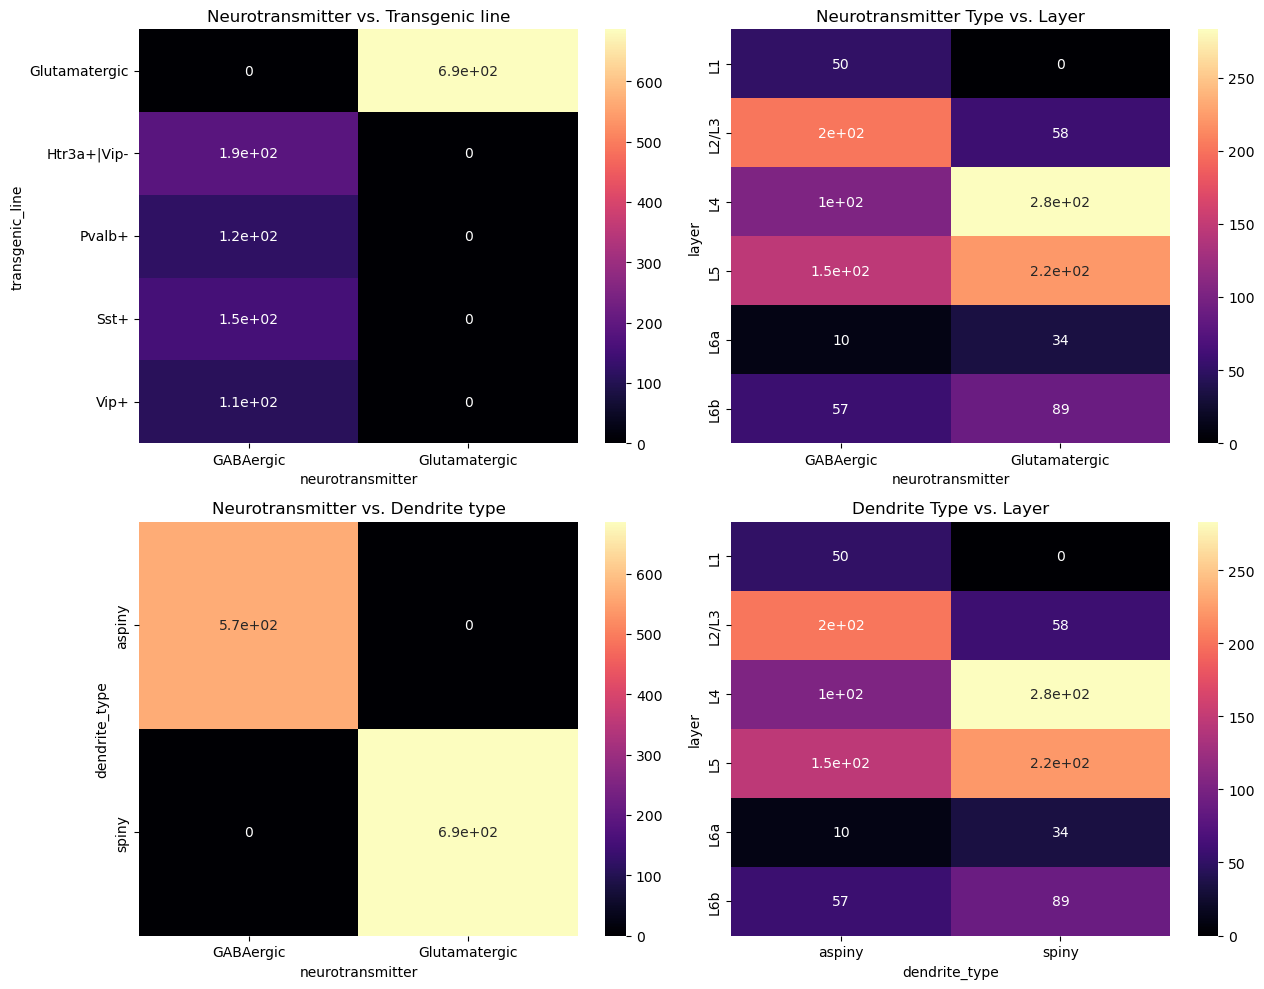

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

sub_df = df_final[['neurotransmitter', 'transgenic_line']]
pivot = pd.pivot_table(sub_df, index='transgenic_line', columns='neurotransmitter', aggfunc=len, fill_value=0)
sns.heatmap(pivot, cmap='magma', annot=True, ax=axes[0])
axes[0].set_title('Neurotransmitter vs. Transgenic line')

sub_df = df_final[['neurotransmitter', 'layer']]
pivot = pd.pivot_table(sub_df, index='layer', columns='neurotransmitter', aggfunc=len, fill_value=0)
sns.heatmap(pivot, cmap='magma', annot=True, ax=axes[1])
axes[1].set_title('Neurotransmitter Type vs. Layer')

sub_df = df_final[['neurotransmitter', 'dendrite_type']]
pivot = pd.pivot_table(sub_df, index='dendrite_type', columns='neurotransmitter', aggfunc=len, fill_value=0)
sns.heatmap(pivot, cmap='magma', annot=True, ax=axes[2])
axes[2].set_title('Neurotransmitter vs. Dendrite type')

sub_df = df_final[['dendrite_type', 'layer']]
pivot = pd.pivot_table(sub_df, index='layer', columns='dendrite_type', aggfunc=len, fill_value=0)
sns.heatmap(pivot, cmap='magma', annot=True, ax=axes[3])
axes[3].set_title('Dendrite Type vs. Layer')

plt.tight_layout()
plt.show()

We can see that the Neurotransmitter vs. Layer heatmap and the Dendrite Type vs. Layer heatmap show some interesting patterns of the data, so this connections may be relevant for the predictions. However,  from the Neurotransmitter vs. Transgenic line and Neurotransmitter vs. Dendrite type graphs we can conclude that the transgenic_line and dendrite_type features are not relevant since they are completely identical with the labels. 

Although the layer data may be interesting and helpful for prediction, we will focus on our research question which aims to label the neuron based solely on its electrical activity data as will be available in real life situations. Hence, we will drop the categorial features:

In [81]:
df_final=df_final.drop(columns=['transgenic_line', 'dendrite_type','layer'])
df_final.head()

,threshold_v_noise,threshold_i_noise,peak_v_noise,peak_i_noise,trough_v_noise,trough_i_noise,upstroke_noise,upstroke_v_noise,downstroke_noise,downstroke_v_noise,fast_trough_v_noise,fast_trough_i_noise,width_noise,upstroke_downstroke_ratio_noise,f_i_curve_slope,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,input_resistance_mohm,latency,peak_v_long_square,peak_v_ramp,peak_v_short_square,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,neurotransmitter
0,-33.490959,536.025940,28.835495,537.739807,-55.978970,531.014160,299.764818,-0.535574,-217.133925,-1.393082,-55.651138,537.142273,0.000482,1.372739,0.020384,-59.187500,-57.437500,-62.600004,143.634288,0.027140,35.375004,31.343750,34.662501,119.977675,0.054033,1.317484,11.291090,270.0,343.125000,800.0,-36.281250,-33.812500,-43.500002,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987,GABAergic
2,-32.416935,457.616455,22.210737,456.798065,-47.572384,355.919861,210.460299,-2.773237,-52.187941,4.122596,-43.588943,424.087616,0.001042,4.060156,0.191853,-47.093754,-51.447919,-55.989586,173.215264,0.074720,16.781250,23.052084,27.770835,102.968708,0.030460,2.283349,5.166574,280.0,185.083333,720.0,-28.781252,-32.312503,-38.197918,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036,GABAergic
4,-37.541275,121.457550,41.824291,121.318398,-53.327831,98.995285,334.820846,3.641510,-91.202334,16.553066,-43.495281,119.950470,0.000850,3.668570,0.177671,-45.843754,-47.145836,-51.700002,214.522896,0.048760,45.562504,48.552083,45.925002,164.062530,0.219570,1.727257,18.353459,70.0,58.625000,720.0,-38.093754,-38.697918,-45.306252,-57.281254,-56.406253,-70.537502,4.059995,4.121745,4.017244,-87.093758,-69.362984,Glutamatergic
5,-39.368126,272.029999,36.275623,271.239990,-51.364376,200.197495,274.559460,-2.106875,-50.152876,19.598125,-45.650623,251.399994,0.001366,5.563230,0.130988,-48.625004,-48.322918,-50.651044,159.199344,0.089740,46.437500,42.895835,39.958334,125.937417,0.037685,1.667094,13.719305,110.0,103.375000,600.0,-41.562500,-42.895835,-45.307294,-54.500004,-54.833336,-70.614586,5.164409,5.124497,4.561945,-84.937508,-70.497147,Glutamatergic
6,-34.328571,270.575012,32.151787,270.135712,-53.919643,191.085709,323.153502,-0.449107,-99.420629,15.998215,-43.549999,245.567856,0.000696,3.247707,0.139337,-44.468754,-45.197919,-46.587502,105.986640,0.059385,35.781254,38.697918,43.700003,95.178552,0.031621,1.063488,25.216166,130.0,119.583323,424.0,-36.656254,-35.895835,-48.556252,-54.281254,-55.656254,-75.062500,3.386317,3.171764,3.857029,-87.000008,-75.066132,Glutamatergic


Now, let`s see the relationships between the numerical features: 

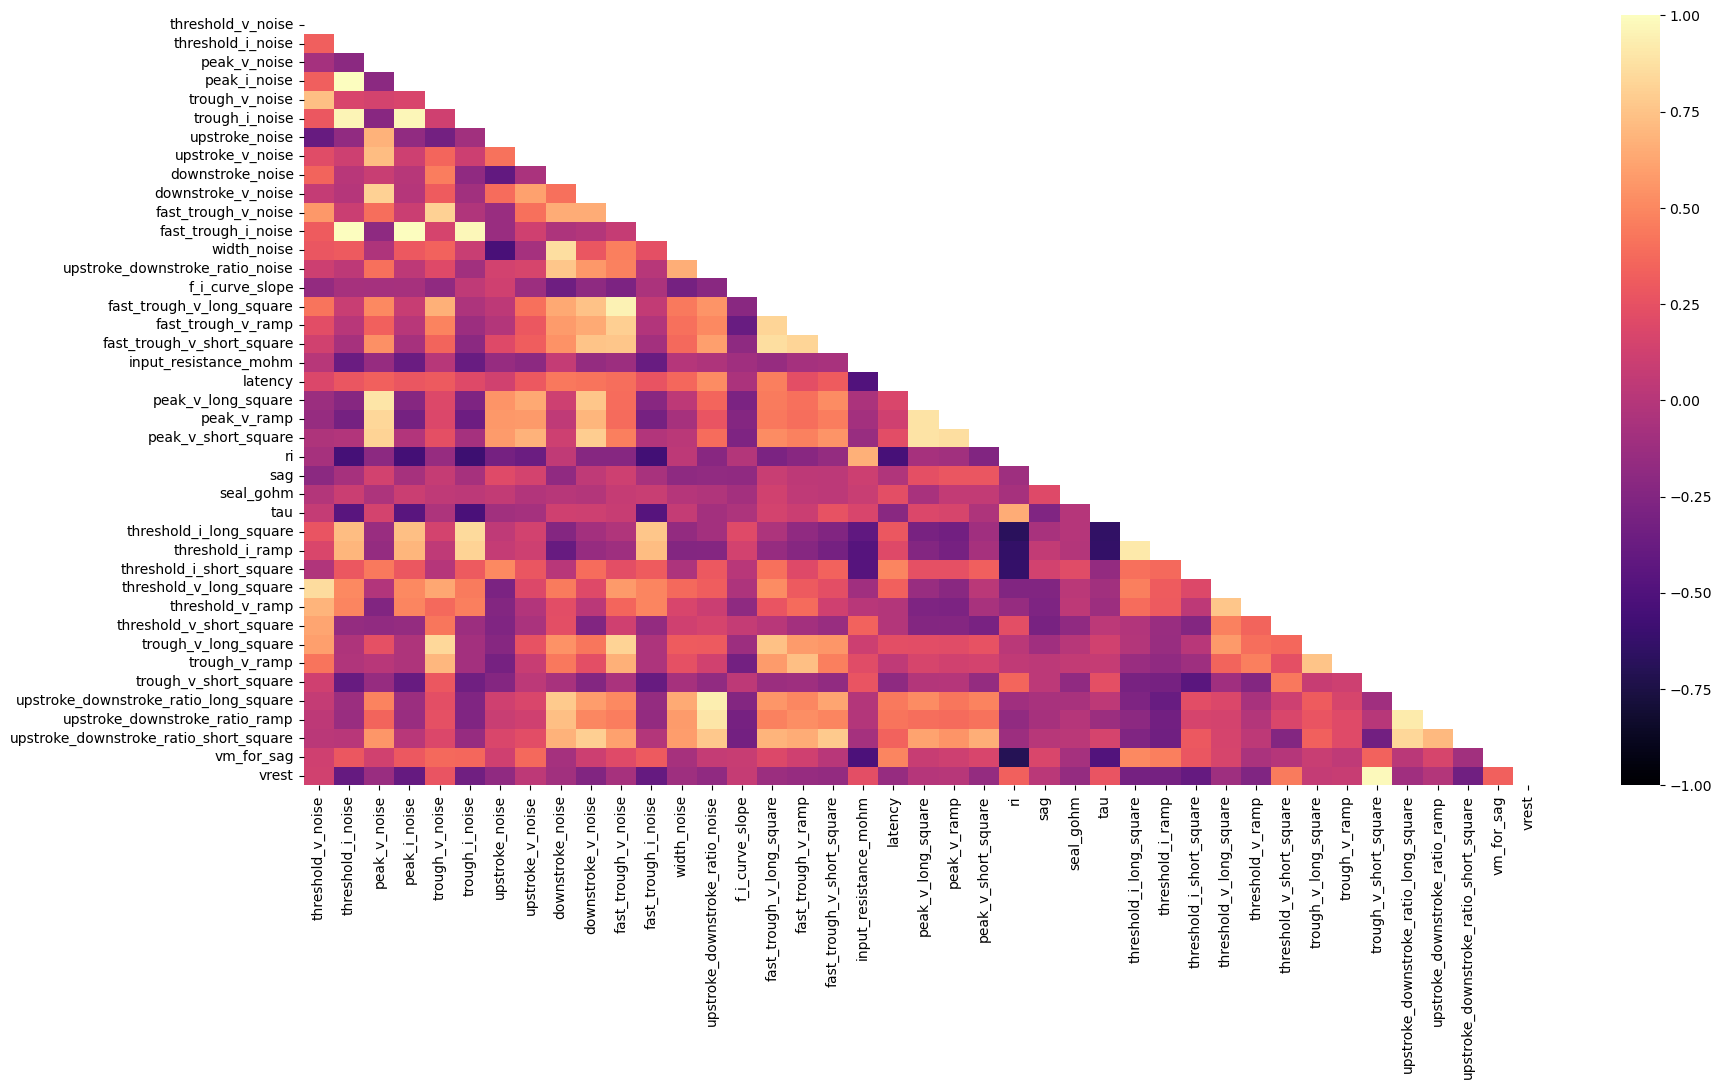

In [82]:
# We present only the lower triangular of the heatmap to emphasize the correlations between different features
plt.figure(figsize=(20, 10))
correlation_matrix = df_final[0:42].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, cmap='magma', vmin=-1, vmax=1, mask=mask)
plt.show()

Presenting the most correlated features (r > 0.9):

In [83]:
correlated_pairs_df = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'Correlation'])

for i, col1 in enumerate(correlation_matrix.columns):
    for col2 in correlation_matrix.columns[i + 1:]: 
        correlation_value = correlation_matrix.loc[col1, col2]
        if abs(correlation_value) > 0.9:
            correlated_pairs_df = correlated_pairs_df.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Correlation': correlation_value
            }, ignore_index=True)
 
correlated_pairs_df.sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
0,threshold_i_noise,peak_i_noise,0.999976
4,peak_i_noise,fast_trough_i_noise,0.997329
2,threshold_i_noise,fast_trough_i_noise,0.996854
9,trough_v_short_square,vrest,0.983869
5,trough_i_noise,fast_trough_i_noise,0.976368
3,peak_i_noise,trough_i_noise,0.961761
1,threshold_i_noise,trough_i_noise,0.960107
6,fast_trough_v_noise,fast_trough_v_long_square,0.948133
7,upstroke_downstroke_ratio_noise,upstroke_downstroke_ratio_long_square,0.934563
10,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,0.918919


We can see that the above pairs of features are highly correlated so we shouldn`t use both features. Therefore, for each pair we need to choose the one that may contribute more to the prediction of the label and drop the less meaningful one. 

For this aim, we want to run a statistical test to asses which numerical features are statistically different between the two labels.

First, let's look at the distributions of the features based on their label ('neurotransmitter') to decide which statistical test is suitable: 

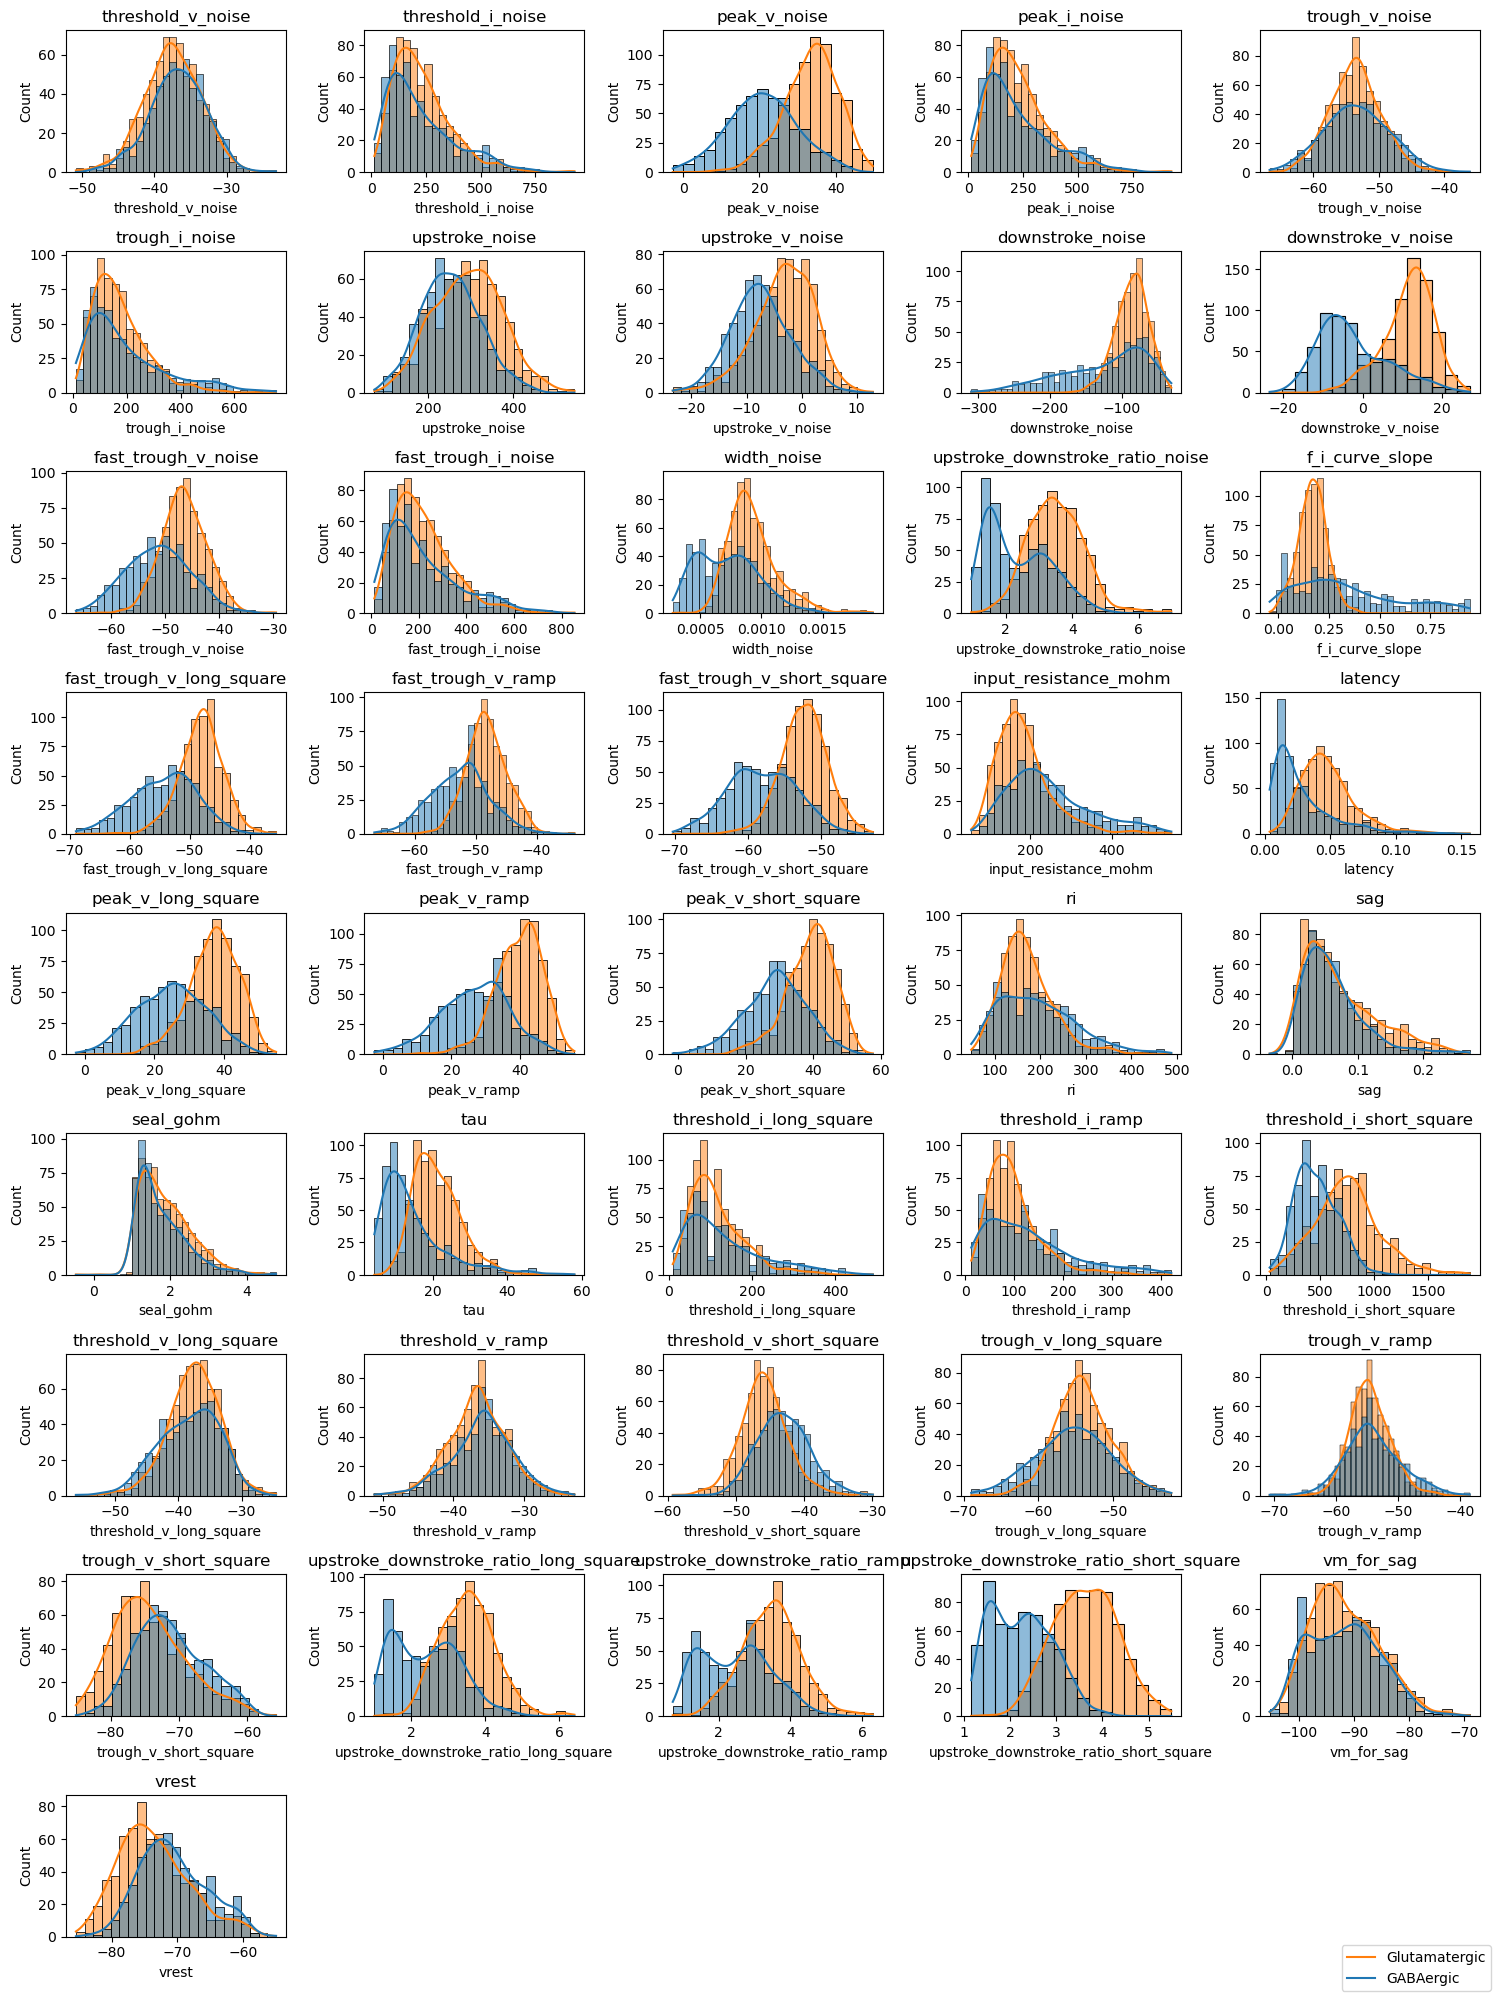

In [84]:
import scipy.stats as stats

colnames = df_final.columns[0:41]
num_rows = 9
num_cols = 5  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, colname in enumerate(colnames):
    sns.histplot(data=df_final, x=colname, hue='neurotransmitter', kde=True, ax=axes[i],legend=False)
    axes[i].set_title(colname) 
        

for j in range(len(colnames), num_rows*num_cols):
    fig.delaxes(axes[j])
    
fig.legend(['Glutamatergic','GABAergic'],loc='lower right')
plt.tight_layout()
plt.show()

As can be seen, not all features are normally distributed (for example, some of the graphs are skewed). Therefore, the non-parametric test that is suitable to asses differences in quantitative continuous data between two independant groups is the "Mann-Whitney U" test:

In [85]:
mannwhitney_results = {}

for i, colname in enumerate(colnames):
           
    groups = [df_final[df_final['neurotransmitter'] == nt][colname] for nt in df_final['neurotransmitter'].unique()]
    u_statistic, p_value = stats.mannwhitneyu(*groups, alternative='two-sided')
    mannwhitney_results[colname] = {'U-statistic': u_statistic, 'p-value': p_value}
    
print('Mann-Whitney test results:')
for colname, result in mannwhitney_results.items():
    print(f"\nResults for {colname}:")
    print(f"U-statistic: {result['U-statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")


Mann-Whitney test results:

Results for threshold_v_noise:
U-statistic: 216162.0000
p-value: 0.0008

Results for threshold_i_noise:
U-statistic: 178414.0000
p-value: 0.0102

Results for peak_v_noise:
U-statistic: 53593.0000
p-value: 0.0000

Results for peak_i_noise:
U-statistic: 178510.0000
p-value: 0.0106

Results for trough_v_noise:
U-statistic: 199740.5000
p-value: 0.4412

Results for trough_i_noise:
U-statistic: 197152.0000
p-value: 0.7154

Results for upstroke_noise:
U-statistic: 136509.0000
p-value: 0.0000

Results for upstroke_v_noise:
U-statistic: 107180.5000
p-value: 0.0000

Results for downstroke_noise:
U-statistic: 126432.0000
p-value: 0.0000

Results for downstroke_v_noise:
U-statistic: 44709.0000
p-value: 0.0000

Results for fast_trough_v_noise:
U-statistic: 99136.0000
p-value: 0.0000

Results for fast_trough_i_noise:
U-statistic: 180746.0000
p-value: 0.0274

Results for width_noise:
U-statistic: 102627.5000
p-value: 0.0000

Results for upstroke_downstroke_ratio_noise:
U-s

Printing the significant results (p < 0.05) which distinguish between the two neurotransmitter populations:

In [86]:
print('Mann-Whitney test- significant results:')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

for colname, result in mannwhitney_results.items():
   if result['p-value']<0.05:
    print(f"\nResults for {colname}:")
    print(f"U-statistic: {result['U-statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")


Mann-Whitney test- significant results:

Results for threshold_v_noise:
U-statistic: 216162.0000
p-value: 0.0008

Results for threshold_i_noise:
U-statistic: 178414.0000
p-value: 0.0102

Results for peak_v_noise:
U-statistic: 53593.0000
p-value: 0.0000

Results for peak_i_noise:
U-statistic: 178510.0000
p-value: 0.0106

Results for upstroke_noise:
U-statistic: 136509.0000
p-value: 0.0000

Results for upstroke_v_noise:
U-statistic: 107180.5000
p-value: 0.0000

Results for downstroke_noise:
U-statistic: 126432.0000
p-value: 0.0000

Results for downstroke_v_noise:
U-statistic: 44709.0000
p-value: 0.0000

Results for fast_trough_v_noise:
U-statistic: 99136.0000
p-value: 0.0000

Results for fast_trough_i_noise:
U-statistic: 180746.0000
p-value: 0.0274

Results for width_noise:
U-statistic: 102627.5000
p-value: 0.0000

Results for upstroke_downstroke_ratio_noise:
U-statistic: 75888.0000
p-value: 0.0000

Results for f_i_curve_slope:
U-statistic: 273047.5000
p-value: 0.0000

Results for fast_t

Printing the non-significant results (p > 0.05) that we will consider to drop:

In [87]:
print('Mann-Whitney test- NON significant results:')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

for colname, result in mannwhitney_results.items():
   if result['p-value']>0.05:
    print(f"\nResults for {colname}:")
    print(f"U-statistic: {result['U-statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")


Mann-Whitney test- NON significant results:

Results for trough_v_noise:
U-statistic: 199740.5000
p-value: 0.4412

Results for trough_i_noise:
U-statistic: 197152.0000
p-value: 0.7154

Results for threshold_i_long_square:
U-statistic: 200757.0000
p-value: 0.3513

Results for trough_v_ramp:
U-statistic: 203690.5000
p-value: 0.1649

Results for vm_for_sag:
U-statistic: 193506.5000
p-value: 0.8365


Before deciding which features to drop, let's use the SHAP package for another evaluation of feature importance to be on the safe side:

In [88]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

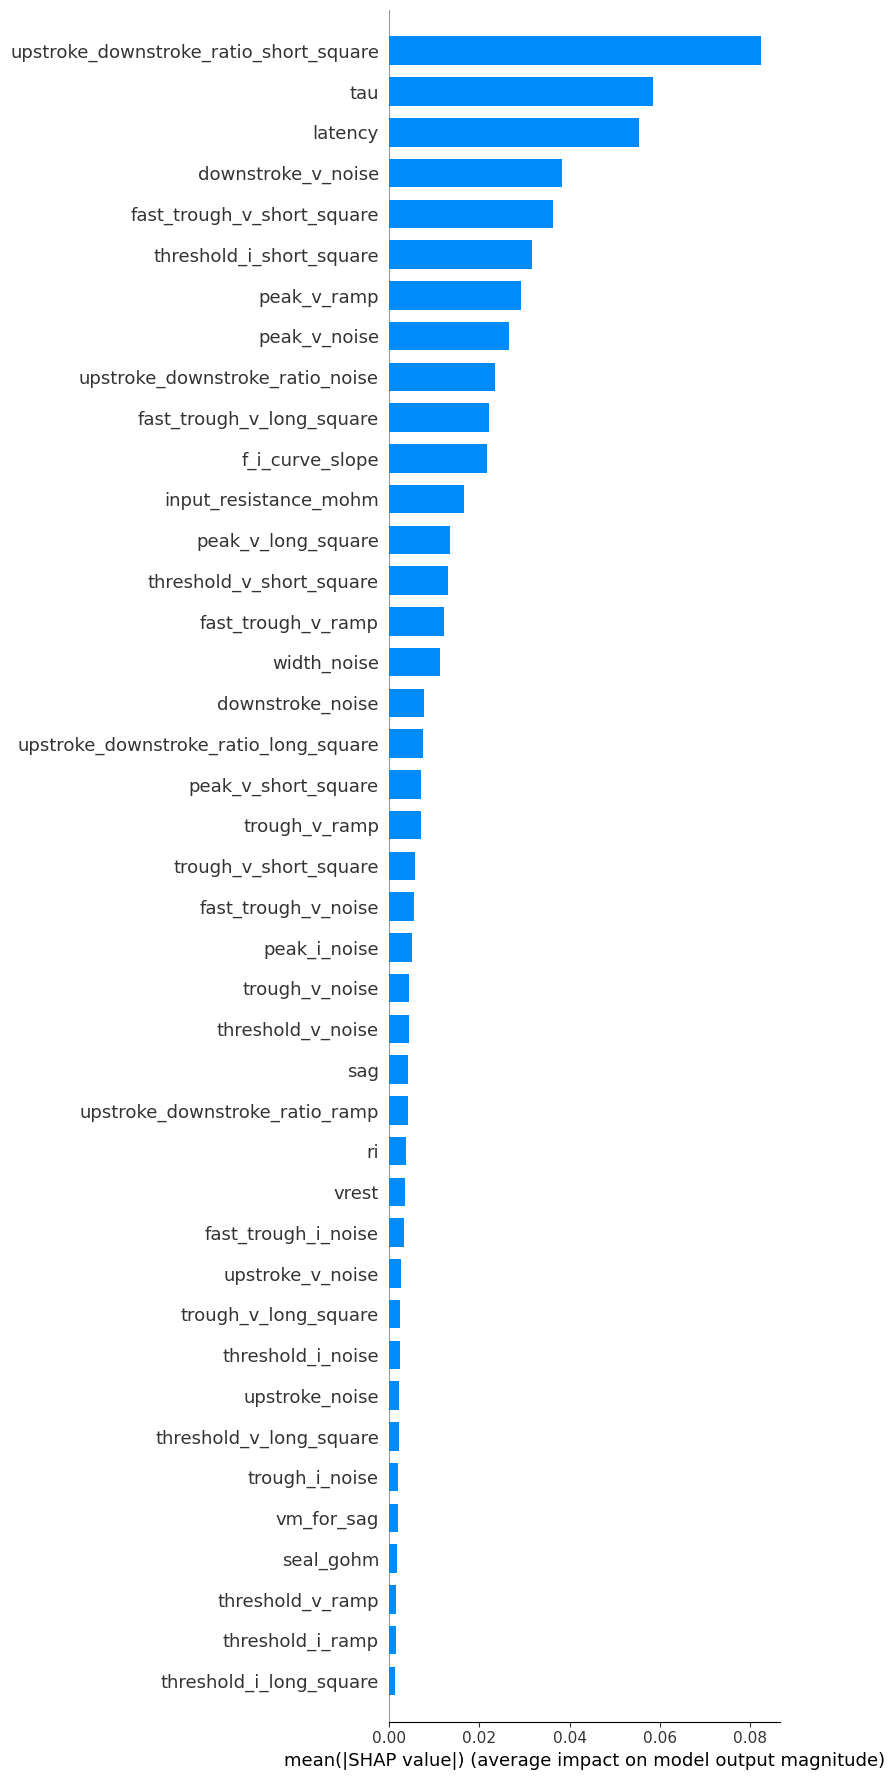

In [89]:
X = df_noNA_noOutliers_numeric 
y = df_final['neurotransmitter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=1)  
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)  

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type='bar',max_display=100000000000000)


Now let's decide which features should be removed:
1. Features that were highly correlated with each other (r > 0.9)- we aim to remove one of them to avoid redundency and overfitting. To decide which one should be dropped, we compare the SHAP values for each feature in the pairs and mark the feature with the lower SHAP value with a red strikethough line (as shown in *Figure 4*).
2. Features that were found as non significant in the Mann-Whitney test (had low correlation with the y label) are marked with a green strikethough line (as shown in *Figure 4A*). 

That was done to compare the statistical tests` results with the SHAP results and reassure that those features are less meaningful.



<img src="SHAP_values.png" alt="Absolute SHAP values of the features in a descending order" width="500" height="1000">

<img src="corr_values.png" alt="Chosing the more important features between correlated pairs (the less important ones were removed)." width="500" height="300" style="vertical-align: top;">

*Figure 4:* A) Absolute SHAP values of the features in a descending order;      B) Chosing the more important features between correlated pairs (the less important ones were removed).




We can see that there is no conflict between the statistical tests and the SHAP results.
In order to reduce the number of features we will drop all the features which have a SHAP rank that is lower than that of the 'upstroke_downstroke_ratio_long_square':

In [90]:
df_final_filtered=df_final.drop(columns=['upstroke_downstroke_ratio_long_square','peak_v_short_square','trough_v_ramp','trough_v_short_square',
                                         'fast_trough_v_noise','peak_i_noise','trough_v_noise','threshold_v_noise','sag','upstroke_downstroke_ratio_ramp',
                                         'ri','vrest','fast_trough_i_noise','upstroke_v_noise','trough_v_long_square','threshold_i_noise','upstroke_noise',
                                         'threshold_v_long_square','trough_i_noise','vm_for_sag','seal_gohm','threshold_v_ramp','threshold_i_ramp','threshold_i_short_square'])
df_final_filtered.head()

,peak_v_noise,downstroke_noise,downstroke_v_noise,width_noise,upstroke_downstroke_ratio_noise,f_i_curve_slope,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,input_resistance_mohm,latency,peak_v_long_square,peak_v_ramp,tau,threshold_i_long_square,threshold_v_short_square,upstroke_downstroke_ratio_short_square,neurotransmitter
0,28.835495,-217.133925,-1.393082,0.000482,1.372739,0.020384,-59.187500,-57.437500,-62.600004,143.634288,0.027140,35.375004,31.343750,11.291090,270.0,-43.500002,1.679550,GABAergic
2,22.210737,-52.187941,4.122596,0.001042,4.060156,0.191853,-47.093754,-51.447919,-55.989586,173.215264,0.074720,16.781250,23.052084,5.166574,280.0,-38.197918,2.680139,GABAergic
4,41.824291,-91.202334,16.553066,0.000850,3.668570,0.177671,-45.843754,-47.145836,-51.700002,214.522896,0.048760,45.562504,48.552083,18.353459,70.0,-45.306252,4.017244,Glutamatergic
5,36.275623,-50.152876,19.598125,0.001366,5.563230,0.130988,-48.625004,-48.322918,-50.651044,159.199344,0.089740,46.437500,42.895835,13.719305,110.0,-45.307294,4.561945,Glutamatergic
6,32.151787,-99.420629,15.998215,0.000696,3.247707,0.139337,-44.468754,-45.197919,-46.587502,105.986640,0.059385,35.781254,38.697918,25.216166,130.0,-48.556252,3.857029,Glutamatergic


In [91]:
df_final_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1423
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   peak_v_noise                            1254 non-null   float64
 1   downstroke_noise                        1254 non-null   float64
 2   downstroke_v_noise                      1254 non-null   float64
 3   width_noise                             1254 non-null   float64
 4   upstroke_downstroke_ratio_noise         1254 non-null   float64
 5   f_i_curve_slope                         1254 non-null   float64
 6   fast_trough_v_long_square               1254 non-null   float64
 7   fast_trough_v_ramp                      1254 non-null   float64
 8   fast_trough_v_short_square              1254 non-null   float64
 9   input_resistance_mohm                   1254 non-null   float64
 10  latency                                 1254 non-null   floa

Now that our data is ready, we can move on to use machine learning models.

# Basic Machine Learning Models

First, let's split the data into train and test sets:

In [92]:
X = df_final_filtered.drop(columns='neurotransmitter')
y = df_final_filtered['neurotransmitter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardizing the data:

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Next, we will proceed to select the appropriate ML model. There are two methods to consider when analyzing our data:
1. Supervised learning- as our data has been labeled.
2. Unsupervised learning- to demonstrate a scenario where labels may not be accessible to researchers or clinicians. 

We will evaluate both methods to determine which model is better.
### Supervised learning

Since our data labels are binary and the features are numerical we will try a logistic regression model: 

In [94]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train_scaled,y_train)
predictions_train = logmodel.predict(X_train_scaled)

Printing the classification report for the train and test data:

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_train,predictions_train))

               precision    recall  f1-score   support

    GABAergic       0.93      0.92      0.93       395
Glutamatergic       0.94      0.94      0.94       482

     accuracy                           0.94       877
    macro avg       0.93      0.93      0.93       877
 weighted avg       0.93      0.94      0.93       877



In [96]:
predictions_test = logmodel.predict(X_test_scaled)

print(classification_report(y_test,predictions_test))

               precision    recall  f1-score   support

    GABAergic       0.94      0.97      0.96       173
Glutamatergic       0.97      0.95      0.96       204

     accuracy                           0.96       377
    macro avg       0.96      0.96      0.96       377
 weighted avg       0.96      0.96      0.96       377



Explanation:

Precision= TP/(TP+FP) or TN/(TN+FN), the proportion of right decisions out of the decisions for a group.

Recall= TP/(TP+FN) or TN/(TN+FP), the proportion of the cases that were recognized out of the group.

F1-score= (2 * precision * recall)/(precision + recall), harmonic mean of the two previous values.

Accuracy= (TP+TN)/(P+N), the propotion of all right decisions out of the all observations.

We can see that the results for both the train and test sets are similar for all evaluators (precision, recall, f1-score, accuracy). Therefore, it looks like the model is not overfitted.



### Performance Evaluation

Text(0.5, 1.0, 'ROC curve')

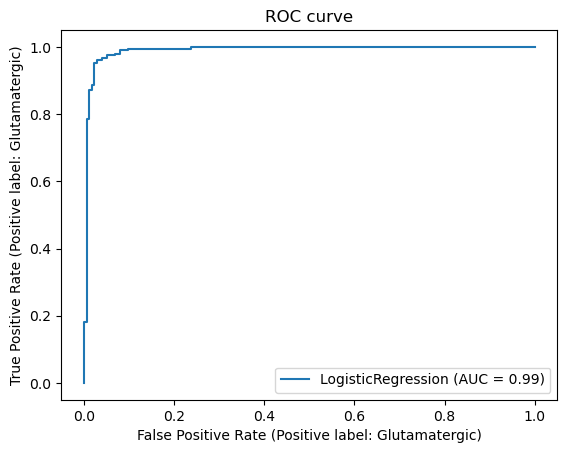

In [97]:
from sklearn.metrics import plot_roc_curve

regression_disp = plot_roc_curve(logmodel, X_test_scaled, y_test)
plt.title('ROC curve')

Text(0.5, 1.0, 'Precision-Recall curve')

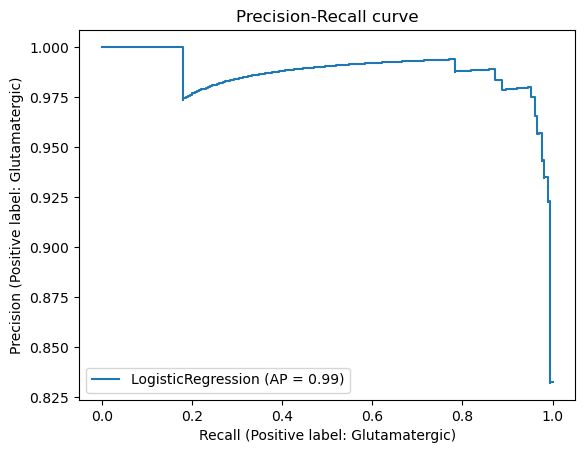

In [98]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(logmodel, X_test_scaled, y_test)
plt.title('Precision-Recall curve')

Both curves indicate excellent performances (high AUC and AP values of 0.99). Therefore, further efforts to improve the model will probably have minor effects.

Let's try using GridSearchCV to improve the model:


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the optimal hyperparameters
best_logmodel = grid_search.best_estimator_

# Predict with the best model
predictions_test = best_logmodel.predict(X_test_scaled)

In [100]:
predictions_test = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predictions_test))

               precision    recall  f1-score   support

    GABAergic       0.94      0.97      0.96       173
Glutamatergic       0.97      0.95      0.96       204

     accuracy                           0.96       377
    macro avg       0.96      0.96      0.96       377
 weighted avg       0.96      0.96      0.96       377



We can see that performances were not improved following the hyperparameter optimization using GridSearch. 

Now let`s try to adjust the threshold:

In [101]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)

logmodel.fit(X_train_scaled, y_train_bin)

predictions_prob_test = logmodel.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds_pr = precision_recall_curve(y_test_bin, predictions_prob_test)

best_threshold = thresholds_pr[np.argmax(2 * precision * recall / (precision + recall))]

predictions_prob_best_threshold = (predictions_prob_test >= best_threshold).astype(int)

y_pred_labels = lb.inverse_transform(predictions_prob_best_threshold)

report = classification_report(y_test, y_pred_labels)

print(f"Chosen Threshold: {best_threshold:.4f}")
print("Classification Report with Chosen Threshold:")
print(report)

Chosen Threshold: 0.4595
Classification Report with Chosen Threshold:
               precision    recall  f1-score   support

    GABAergic       0.95      0.97      0.96       173
Glutamatergic       0.98      0.96      0.97       204

     accuracy                           0.97       377
    macro avg       0.96      0.97      0.97       377
 weighted avg       0.97      0.97      0.97       377



As can be seen, we succeed to slightly improve the results (accuracy increased from 0.96 to 0.97).

We will repeat the same steps for the unfiltered data to conclude on the efficiency of the feature dropping:

In [102]:
X = df_final.drop(columns='neurotransmitter')
y = df_final['neurotransmitter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [104]:
logmodel.fit(X_train_scaled,y_train)
predictions_train = logmodel.predict(X_train_scaled)

Printing the classification report for the train and test sets:

In [105]:
print(classification_report(y_train,predictions_train)) #for the train set

               precision    recall  f1-score   support

    GABAergic       0.98      0.99      0.99       395
Glutamatergic       0.99      0.99      0.99       482

     accuracy                           0.99       877
    macro avg       0.99      0.99      0.99       877
 weighted avg       0.99      0.99      0.99       877



Let's make sure these excellent results are consistent by using cross-validation:

In [106]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(logmodel, X_train_scaled, y_train, cv=5)  

print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))

Cross-validation scores: [0.97159091 0.97727273 0.98857143 0.97142857 0.98285714]
Mean CV score: 0.9783441558441558


The accuracy scores remain high without major differences between one another. We wil print the classification report for the test set as well:

In [107]:
predictions_test = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predictions_test)) #for the test set

               precision    recall  f1-score   support

    GABAergic       0.98      0.97      0.97       173
Glutamatergic       0.98      0.98      0.98       204

     accuracy                           0.98       377
    macro avg       0.98      0.98      0.98       377
 weighted avg       0.98      0.98      0.98       377



Results are even better comparing with the filtered data. Let\`s try to understand the reason. We will plot the model\`s coefficients:

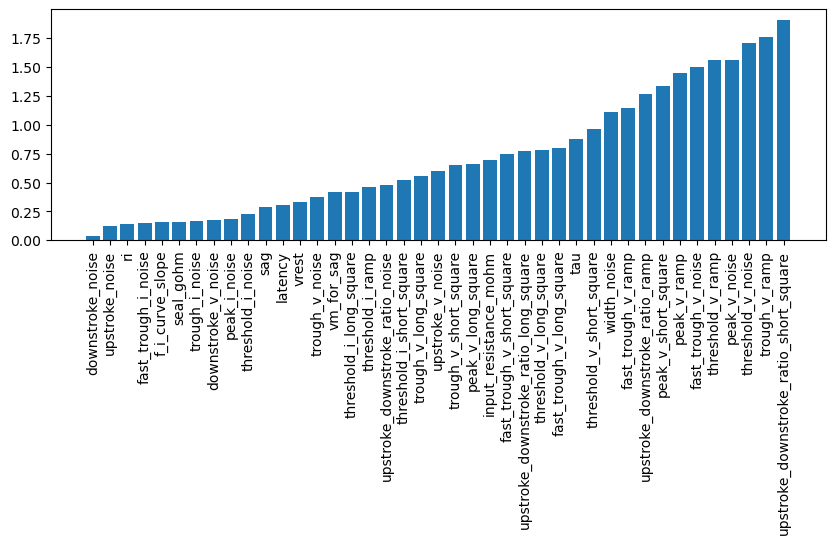

In [108]:
# Higher the absolute value of a feature weight, more is its importance for the model.
important_features = np.argsort(np.max(np.abs(logmodel.coef_), axis=0))
names = X_train.columns[important_features]
plt.figure(figsize=(10,3))
plt.bar(names, np.sort(np.max(np.abs(logmodel.coef_), axis=0)))
plt.xticks(rotation=90)
plt.tight_layout()

From the above plot of the feature weights, we can see that some important features were removed based on the SHAP, Mann-Whitney and correlation test results. One possible explanation may be the fact that the SHAP scores were calculated using decision tree model.

So far, we got excellent results for the logistic regression model.

Now, we will try the unsupervised learning method.

### Unsupervised learning

As we said previously, our data is binary labeled. So, we think that the K-Means model may be suitable for our data, while defining K=2.

Preparing the unfiltered data:

In [109]:
X = df_final.drop(columns='neurotransmitter')
y = df_final['neurotransmitter']

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

Let\`s run the K-Means model and plot the contingency matrix:

<AxesSubplot:>

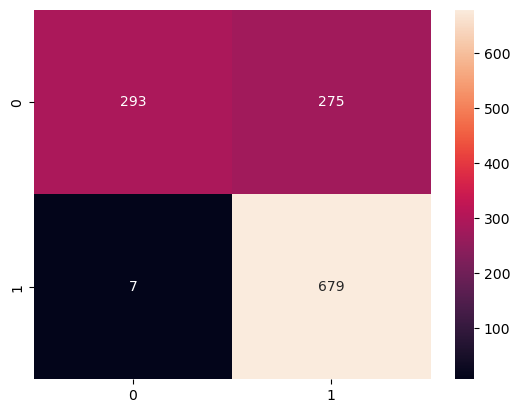

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

kmeans=KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
clusters_swapped = 1 - clusters  # Swapping 0s to 1s and 1s to 0s to adjust the K-Means` labels to the y labels
kmeans.fit(X_scaled)

sns.heatmap(contingency_matrix(y_bin, clusters_swapped), annot=True, fmt='g')

Printing the classification report:

In [ ]:
print(classification_report(y_bin,clusters_swapped))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68       568
           1       0.71      0.99      0.83       686

    accuracy                           0.78      1254
   macro avg       0.84      0.75      0.75      1254
weighted avg       0.83      0.78      0.76      1254



The results are quite good for a start, but are not satisfying. We will try to improve the model\`s performance using dimensionality reduction.

We will first try Principal Component Analysis (PCA). 

To get some idea regarding the effect of the dimensionality reduction, we will plot the explained variance versus the number of eigenvectors:

Text(0, 0.5, 'Explained Variance')

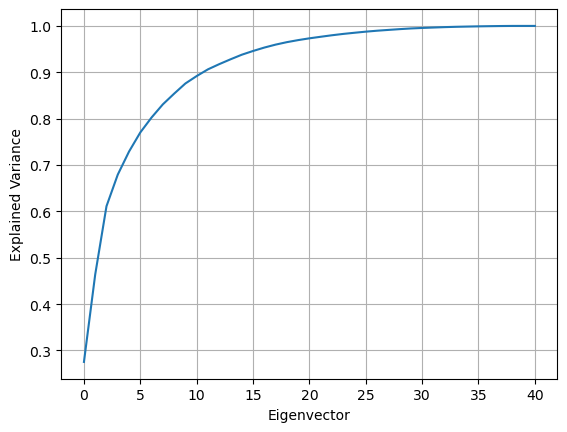

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=41)
pca_embedding = pca.fit_transform(X_scaled)

plt.plot(range(41), np.cumsum(pca.explained_variance_ratio_))
plt.grid('on')
plt.xlabel('Eigenvector')
plt.ylabel('Explained Variance')

It can be seen that aroung 20 eigenvectors the explained variance is very close to 1 and the slope decreases dramatically.

We will first try to work with the two largest eigenvectors to check whether it is good enough. In addition, it allows us to clearly visualize the results:

In [ ]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(X_scaled)

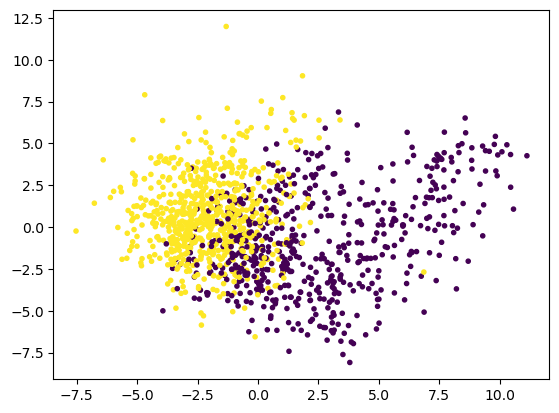

In [ ]:
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],
            c=y_bin, marker=".", cmap='viridis')

<AxesSubplot:>

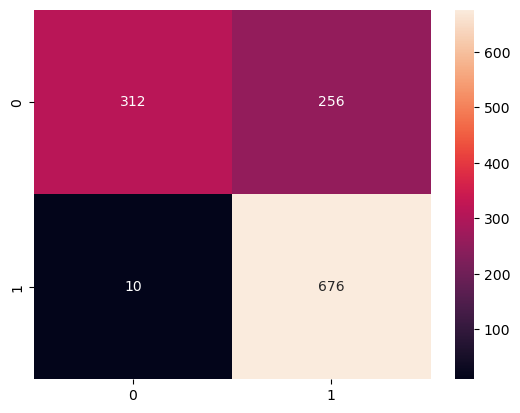

In [ ]:
#kmeans=KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_embedding)
kmeans.fit(pca_embedding)

sns.heatmap(contingency_matrix(y_bin, clusters), annot=True, fmt='g')

In [ ]:
print(classification_report(y_bin,clusters))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       568
           1       0.73      0.99      0.84       686

    accuracy                           0.79      1254
   macro avg       0.85      0.77      0.77      1254
weighted avg       0.84      0.79      0.77      1254



No major changes are noticable in the model\`s performances. Therefore, we will rely on more eigenvectors. We will include 20 components according to our conclusion from "the explained variance versus the number of eigenvectors" graph:

In [ ]:
pca = PCA(n_components=20)
pca_embedding = pca.fit_transform(X_scaled)

<AxesSubplot:>

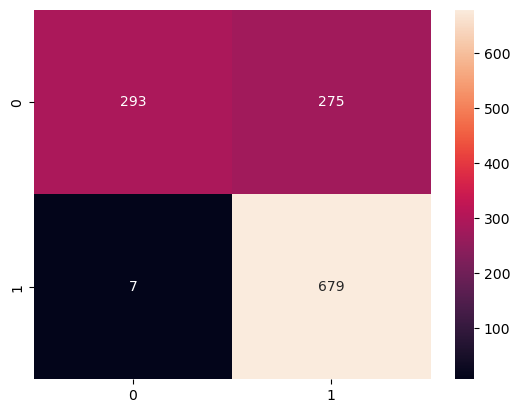

In [ ]:
kmeans=KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_embedding)
clusters_swapped=1-clusters
kmeans.fit(pca_embedding)

sns.heatmap(contingency_matrix(y_bin, clusters_swapped), annot=True, fmt='g')

In [ ]:
print(classification_report(y_bin,clusters_swapped))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68       568
           1       0.71      0.99      0.83       686

    accuracy                           0.78      1254
   macro avg       0.84      0.75      0.75      1254
weighted avg       0.83      0.78      0.76      1254



Yet, results were not improved. Let\`s try to use a non-linear approach- Uniform Manifold Approximation and Projection (UMAP) algorithm:

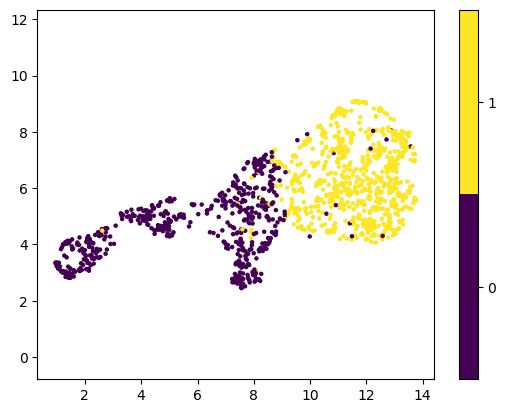

In [ ]:
import umap

umap_obj = umap.UMAP(n_components=2, random_state=42)

umap_embedding = umap_obj.fit_transform(X_scaled)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_bin, cmap='viridis', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.show()

<AxesSubplot:>

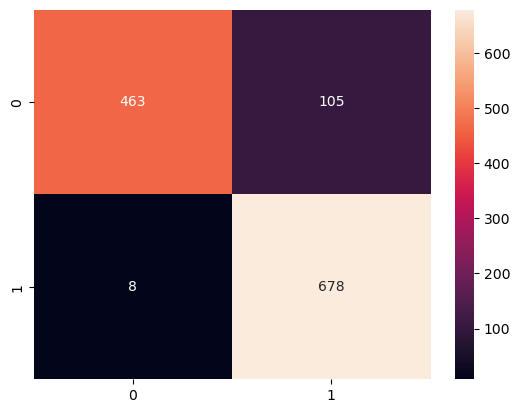

In [ ]:
clusters = kmeans.fit_predict(umap_embedding)
clusters_swapped=1-clusters
kmeans.fit(umap_embedding)

sns.heatmap(contingency_matrix(y_bin, clusters_swapped), annot=True, fmt='g')

In [ ]:
print(classification_report(y_bin,clusters_swapped))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       568
           1       0.87      0.99      0.92       686

    accuracy                           0.91      1254
   macro avg       0.92      0.90      0.91      1254
weighted avg       0.92      0.91      0.91      1254



We got much better results. It is good, but we will check if this can be further improved.
We will try the T-distributed Stochastic Neighbor Embedding (TSNE) algorithm:

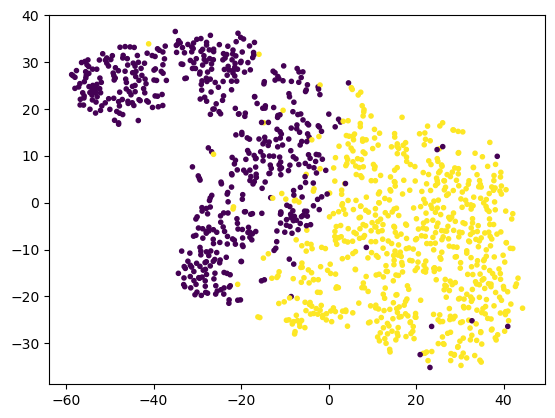

In [ ]:
from sklearn.manifold import TSNE

tsne_obj = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne_obj.fit_transform(X_scaled)

plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], 
        c=y_bin, marker=".", cmap='viridis')

<AxesSubplot:>

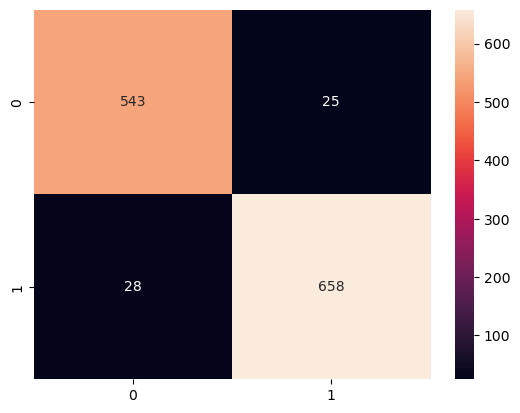

In [ ]:
clusters = kmeans.fit_predict(tsne_embedding)
clusters_swapped=1-clusters
kmeans.fit(tsne_embedding)

sns.heatmap(contingency_matrix(y_bin, clusters_swapped), annot=True, fmt='g')

In [ ]:
print(classification_report(y_bin,clusters_swapped))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       568
           1       0.96      0.96      0.96       686

    accuracy                           0.96      1254
   macro avg       0.96      0.96      0.96      1254
weighted avg       0.96      0.96      0.96      1254



Results were improved- we got 96% accuracy for the model.

### Summary

In conclusion, we have demonstrated two ML approaches: supervised and unsupervised learning. We achieved good performances for both methods.

For supervised learning, we used the logistic regression model and after finding the optimized conditions to work with (refering to the data and the hyperparameters) we achieved an accuracy of 98%.

For unsupervised learning, we used the K-Means model and compared different dimensionality reduction techniques. Finally, we got the best results with TSNE and achieved an accuracy of 96%.

Overall, the results indicate that the data is informative and allows us to classify neurons according to their electrical activity into the type of function they perform (excitatory / inhibitory).